In [1]:
##import pandas
import pandas as pd
import numpy as np

In [2]:
##read selected file
df = pd.read_csv('Traffic_Collision_Data_from_2019_to_Present.csv') 

In [3]:
##conduct data exploration 
df.shape

(90784, 18)

In [4]:
df.head(3)

DR Number Date Reported Date Occurred  Time Occurred  Area ID Area Name  \
0  200704291    01/07/2020    01/01/2019           1033        7  Wilshire   
1  191304041    01/01/2019    01/01/2019            200       13    Newton   
2  191418727    08/25/2019    01/01/2019           2250       14   Pacific   

   Reporting District  Crime Code Crime Code Description  \
0                 793         997      TRAFFIC COLLISION   
1                1383         997      TRAFFIC COLLISION   
2                1494         997      TRAFFIC COLLISION   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                 3101 3401 3701 3004 3030 3036        49.0          F   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0          M   

  Victim Descent  Premise Code Premise Description  \
0              W         101.0              STREET   
1              B         101.0              STREET   
2              W         101.0              STREET   

                           Address Cross Street              Location  
0                         CRENSHAW   WASHINGTON  (34.0399, -118.3311)  
1  59TH                         ST     BROADWAY  (33.9869, -118.2783)  
2                        VICKSBURG      CENTURY   (33.942, -118.4095)

In [5]:
##verify if there are any empty columns
df.columns[df.isna().all()].tolist()

[]

In [6]:
###there are no empty columns. note which columns I want to drop
columns_to_drop =['DR Number', 'Date Reported', 'Reporting District', 'Crime Code', 'Crime Code Description', 'Premise Code', 'Premise Description']

In [7]:
##redefine df to exclude these dropped columns
df = df.drop(columns_to_drop,axis=1)

In [8]:
##check that these columns have been dropped from df
df.head()

Date Occurred  Time Occurred  Area ID Area Name  \
0    01/01/2019           1033        7  Wilshire   
1    01/01/2019            200       13    Newton   
2    01/01/2019           2250       14   Pacific   
3    01/01/2019           2130        8   West LA   
4    01/01/2019            240       16  Foothill   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                 3101 3401 3701 3004 3030 3036        49.0          F   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0          M   
3       3004 3025 3035 3036 3101 3401 3701 4027        52.0          M   
4       3037 3039 3006 3028 3101 3401 3701 4026        50.0          M   

  Victim Descent                          Address  \
0              W                         CRENSHAW   
1              B  59TH                         ST   
2              W                        VICKSBURG   
3              H  OVERLAND                     AV   
4              H  FAIR                         AV   

                      Cross Street              Location  
0                       WASHINGTON  (34.0399, -118.3311)  
1                         BROADWAY  (33.9869, -118.2783)  
2                          CENTURY   (33.942, -118.4095)  
3  NATIONAL                     BL  (34.0325, -118.4176)  
4  ARMINTA                      ST  (34.2135, -118.3747)

In [9]:
##check information type of columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90784 entries, 0 to 90783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date Occurred   90784 non-null  object 
 1   Time Occurred   90784 non-null  int64  
 2   Area ID         90784 non-null  int64  
 3   Area Name       90784 non-null  object 
 4   MO Codes        86656 non-null  object 
 5   Victim Age      83848 non-null  float64
 6   Victim Sex      88634 non-null  object 
 7   Victim Descent  88376 non-null  object 
 8   Address         90784 non-null  object 
 9   Cross Street    84741 non-null  object 
 10  Location        90784 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 7.6+ MB


<ipython-input-9-b00166aa1cfb>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [10]:
##make "Date Occurred" type as datetime64
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])  

In [11]:
##verify that "Date Occurred" and "Location" updated correctly
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90784 entries, 0 to 90783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Occurred   90784 non-null  datetime64[ns]
 1   Time Occurred   90784 non-null  int64         
 2   Area ID         90784 non-null  int64         
 3   Area Name       90784 non-null  object        
 4   MO Codes        86656 non-null  object        
 5   Victim Age      83848 non-null  float64       
 6   Victim Sex      88634 non-null  object        
 7   Victim Descent  88376 non-null  object        
 8   Address         90784 non-null  object        
 9   Cross Street    84741 non-null  object        
 10  Location        90784 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 7.6+ MB


<ipython-input-11-3568b37b2f28>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [12]:
##I want to have the coordinates in separate columns because I'm running into issues later since they're all in in column.
df.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)

Latitude  Longitude
0      34.0399  -118.3311
1      33.9869  -118.2783
2       33.942  -118.4095
3      34.0325  -118.4176
4      34.2135  -118.3747
...        ...        ...
90779  34.2674  -118.4222
90780   33.998  -118.4108
90781  34.1106  -118.1908
90782  34.0453  -118.2483
90783  34.0472   -118.309

[90784 rows x 2 columns]

In [13]:
##redefine df so that these columns are saved and verify that it works.

df = pd.concat((df, df.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)), axis=1)
df.head(1)

Date Occurred  Time Occurred  Area ID Area Name  \
0    2019-01-01           1033        7  Wilshire   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   

  Victim Descent   Address Cross Street              Location Latitude  \
0              W  CRENSHAW   WASHINGTON  (34.0399, -118.3311)  34.0399   

   Longitude  
0  -118.3311

In [14]:
##run a command so that the data only has the timeframe i want. i want through 3/18/2020 
##since LA shelter in place began 3/19/2020
mask = (df['Date Occurred'] >= '01/01/2019') & (df['Date Occurred'] <= '03/18/2020')
df1=df.loc[mask]
print(df.loc[mask])

      Date Occurred  Time Occurred  Area ID    Area Name  \
0        2019-01-01           1033        7     Wilshire   
1        2019-01-01            200       13       Newton   
2        2019-01-01           2250       14      Pacific   
3        2019-01-01           2130        8      West LA   
4        2019-01-01            240       16     Foothill   
...             ...            ...      ...          ...   
68105    2020-03-18             25        3    Southwest   
68106    2020-03-18           1500       12  77th Street   
68107    2020-03-18           1510       18    Southeast   
68108    2020-03-18           1740        3    Southwest   
68109    2020-03-18           1445       10  West Valley   

                                           MO Codes  Victim Age Victim Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                     3101 3401 3701 3004 3030 3036        49.0          F   
2      3003 3025 3029 3035 3037 3101 3401 370

In [15]:
##this looks good. now i will sort by date occurred in case it isn't already sorted.
df1.sort_values(by='Date Occurred')

Date Occurred  Time Occurred  Area ID    Area Name  \
0        2019-01-01           1033        7     Wilshire   
92       2019-01-01           1900        7     Wilshire   
91       2019-01-01           1930        7     Wilshire   
90       2019-01-01             50        7     Wilshire   
89       2019-01-01           2120        7     Wilshire   
...             ...            ...      ...          ...   
68052    2020-03-18           1400       15  N Hollywood   
68051    2020-03-18           1120       21      Topanga   
68050    2020-03-18           2245       21      Topanga   
68048    2020-03-18           1120       17   Devonshire   
68109    2020-03-18           1445       10  West Valley   

                                           MO Codes  Victim Age Victim Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
92     3006 3028 3030 3035 3037 3101 3401 3701 4027        36.0          M   
91     3006 3028 3030 3035 3037 3101 3401 3701 4027        30.0          F   
90     3006 3028 3030 3035 3037 3101 3401 3701 4007         NaN          F   
89     3004 3028 3030 3035 3037 3101 3401 3701 4027        38.0          M   
...                                             ...         ...        ...   
68052                 3006 3028 3034 3037 3101 4026        50.0          M   
68051                      3009 3025 3037 3101 4021        22.0          M   
68050                      3006 3026 3037 3101 4021        30.0          F   
68048                 3006 3028 3030 3037 3101 4017        45.0          M   
68109                                           NaN        40.0          F   

      Victim Descent                          Address  \
0                  W                         CRENSHAW   
92                 O  HIGHLAND                     AV   
91                 H  LA BREA                      AV   
90                 O  SAINT ELMO                   DR   
89                 W  OLYMPIC                      BL   
...              ...                              ...   
68052              W  VANOWEN                      ST   
68051              O  ROSCOE                       BL   
68050              X  VANOWEN                      ST   
68048              H  TAMPA                        AV   
68109              W  VANOWEN                      ST   

                          Cross Street              Location Latitude  \
0                           WASHINGTON  (34.0399, -118.3311)  34.0399   
92     3RD                          ST  (34.0783, -118.3392)  34.0783   
91     WASHINGTON                   BL  (34.0404, -118.3475)  34.0404   
90     RIMPAU                       AV  (34.0434, -118.3418)  34.0434   
89     MANSFIELD                    AV  (34.0572, -118.3425)  34.0572   
...                                ...                   ...      ...   
68052  WHITSETT                     AV   (34.194, -118.4052)   34.194   
68051  DE SOTO                      AV    (34.22, -118.5885)    34.22   
68050  OSO                          AV  (34.1938, -118.5753)  34.1938   
68048  NORDHOFF                     WY  (34.2355, -118.5536)  34.2355   
68109  VANALDEN                     AV  (34.1939, -118.5491)  34.1939   

       Longitude  
0      -118.3311  
92     -118.3392  
91     -118.3475  
90     -118.3418  
89     -118.3425  
...          ...  
68052  -118.4052  
68051  -118.5885  
68050  -118.5753  
68048  -118.5536  
68109  -118.5491  

[68110 rows x 13 columns]

In [16]:
##i want to see the column names
columns = list(df1)
columns

['Date Occurred',
 'Time Occurred',
 'Area ID',
 'Area Name',
 'MO Codes',
 'Victim Age',
 'Victim Sex',
 'Victim Descent',
 'Address',
 'Cross Street',
 'Location',
 'Latitude',
 'Longitude']

In [17]:
##rename columns
df1.columns = ['Date_Occurred',
 'Time_Occurred',
 'Area_ID',
 'Area_Name',
 'MO_Codes',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Address',
 'Cross_Street',
 'Location',
 'Latitude',
 'Longitude']
df1.head(1)

Date_Occurred  Time_Occurred  Area_ID Area_Name  \
0    2019-01-01           1033        7  Wilshire   

                                       MO_Codes  Victim_Age Victim_Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   

  Victim_Descent   Address Cross_Street              Location Latitude  \
0              W  CRENSHAW   WASHINGTON  (34.0399, -118.3311)  34.0399   

   Longitude  
0  -118.3311

In [18]:
##edit cell contents so its clearer what ethnicity the victim was, for later
df1.loc[df1.Victim_Descent == 'A', 'Victim_Descent'] = 'Other Asian'
df1.loc[df1.Victim_Descent == 'B', 'Victim_Descent'] = 'Black'
df1.loc[df1.Victim_Descent == 'C', 'Victim_Descent'] = 'Chinese'
df1.loc[df1.Victim_Descent == 'D', 'Victim_Descent'] = 'Cambodian'
df1.loc[df1.Victim_Descent == 'F', 'Victim_Descent'] = 'Filipino'
df1.loc[df1.Victim_Descent == 'G', 'Victim_Descent'] = 'Guamanian'
df1.loc[df1.Victim_Descent == 'H', 'Victim_Descent'] = 'Hispanic, Latin, Mexican'
df1.loc[df1.Victim_Descent == 'I', 'Victim_Descent'] = 'American Indian, Alaskan Native'
df1.loc[df1.Victim_Descent == 'J', 'Victim_Descent'] = 'Japanese'
df1.loc[df1.Victim_Descent == 'K', 'Victim_Descent'] = 'Korean'
df1.loc[df1.Victim_Descent == 'L', 'Victim_Descent'] = 'Laotian'
df1.loc[df1.Victim_Descent == 'O', 'Victim_Descent'] = 'Other'
df1.loc[df1.Victim_Descent == 'P', 'Victim_Descent'] = 'Pacific Islander'
df1.loc[df1.Victim_Descent == 'S', 'Victim_Descent'] = 'Samoan'
df1.loc[df1.Victim_Descent == 'U', 'Victim_Descent'] = 'Hawaiian'
df1.loc[df1.Victim_Descent == 'V', 'Victim_Descent'] = 'Vietnamese'
df1.loc[df1.Victim_Descent == 'W', 'Victim_Descent'] = 'White'
df1.loc[df1.Victim_Descent == 'X', 'Victim_Descent'] = 'Unknown'
df1.loc[df1.Victim_Descent == 'Z', 'Victim_Descent'] = 'Asian Indian'
df1.loc[df1.Victim_Sex == 'F', 'Victim_Sex'] = 'Female'
df1.loc[df1.Victim_Sex == 'M', 'Victim_Sex'] = 'Male'
df1.loc[df1.Victim_Sex == 'X', 'Victim_Sex'] = 'Unidentified'

df1.head(5)

/Users/KarenPhan/opt/anaconda3/envs/up229/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Date_Occurred  Time_Occurred  Area_ID Area_Name  \
0    2019-01-01           1033        7  Wilshire   
1    2019-01-01            200       13    Newton   
2    2019-01-01           2250       14   Pacific   
3    2019-01-01           2130        8   West LA   
4    2019-01-01            240       16  Foothill   

                                       MO_Codes  Victim_Age Victim_Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0       Male   
1                 3101 3401 3701 3004 3030 3036        49.0     Female   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0       Male   
3       3004 3025 3035 3036 3101 3401 3701 4027        52.0       Male   
4       3037 3039 3006 3028 3101 3401 3701 4026        50.0       Male   

             Victim_Descent                          Address  \
0                     White                         CRENSHAW   
1                     Black  59TH                         ST   
2                     White                        VICKSBURG   
3  Hispanic, Latin, Mexican  OVERLAND                     AV   
4  Hispanic, Latin, Mexican  FAIR                         AV   

                      Cross_Street              Location Latitude  Longitude  
0                       WASHINGTON  (34.0399, -118.3311)  34.0399  -118.3311  
1                         BROADWAY  (33.9869, -118.2783)  33.9869  -118.2783  
2                          CENTURY   (33.942, -118.4095)   33.942  -118.4095  
3  NATIONAL                     BL  (34.0325, -118.4176)  34.0325  -118.4176  
4  ARMINTA                      ST  (34.2135, -118.3747)  34.2135  -118.3747

In [19]:
##i want to clean up data a bit more so I can graph it easier later.
df1['Month'] = pd.DatetimeIndex(df1['Date_Occurred']).month
df1['Year'] = pd.DatetimeIndex(df1['Date_Occurred']).year
df1_grouped = (df1.groupby(['Year', 'Month'])
                .size()
                .reset_index(name="n_traffic_accidents"))
df1_grouped

<ipython-input-19-16baf628c422>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = pd.DatetimeIndex(df1['Date_Occurred']).month
<ipython-input-19-16baf628c422>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = pd.DatetimeIndex(df1['Date_Occurred']).year


Year  Month  n_traffic_accidents
0   2019      1                 4548
1   2019      2                 4420
2   2019      3                 4929
3   2019      4                 4527
4   2019      5                 4667
5   2019      6                 4491
6   2019      7                 4864
7   2019      8                 4950
8   2019      9                 4911
9   2019     10                 5063
10  2019     11                 4593
11  2019     12                 4660
12  2020      1                 4277
13  2020      2                 4568
14  2020      3                 2642

In [20]:
##add a new column of 'month-year' and populate column. i ultimately want a graph of month-year and n_traffic_accidents
df1_grouped['Month-Year'] = 'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sept 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020'
df1_grouped

Year  Month  n_traffic_accidents Month-Year
0   2019      1                 4548   Jan 2019
1   2019      2                 4420   Feb 2019
2   2019      3                 4929   Mar 2019
3   2019      4                 4527   Apr 2019
4   2019      5                 4667   May 2019
5   2019      6                 4491   Jun 2019
6   2019      7                 4864   Jul 2019
7   2019      8                 4950   Aug 2019
8   2019      9                 4911  Sept 2019
9   2019     10                 5063   Oct 2019
10  2019     11                 4593   Nov 2019
11  2019     12                 4660   Dec 2019
12  2020      1                 4277   Jan 2020
13  2020      2                 4568   Feb 2020
14  2020      3                 2642   Mar 2020

<AxesSubplot:title={'center':'Number of Traffic Accidents Over Time'}, xlabel='Month-Year'>

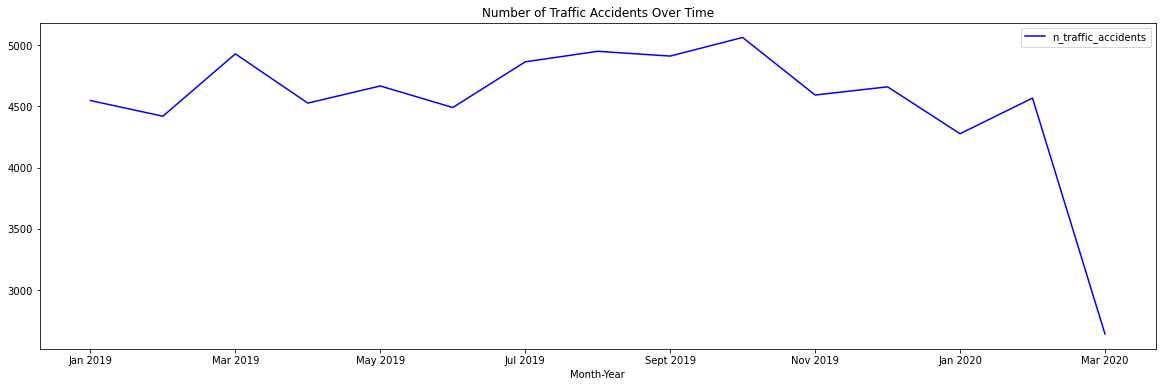

In [21]:
##graph using a line chart so it's easier to see change over time 
df1_grouped.plot(x="Month-Year", y="n_traffic_accidents", color='blue', 
                 title = 'Number of Traffic Accidents Over Time',
                figsize=(20, 6))

In [22]:
##save this data as a CSV. df1 is the pre-covid data. 
df1.to_csv('Pre-Covid19_Data_Trimmed.csv')

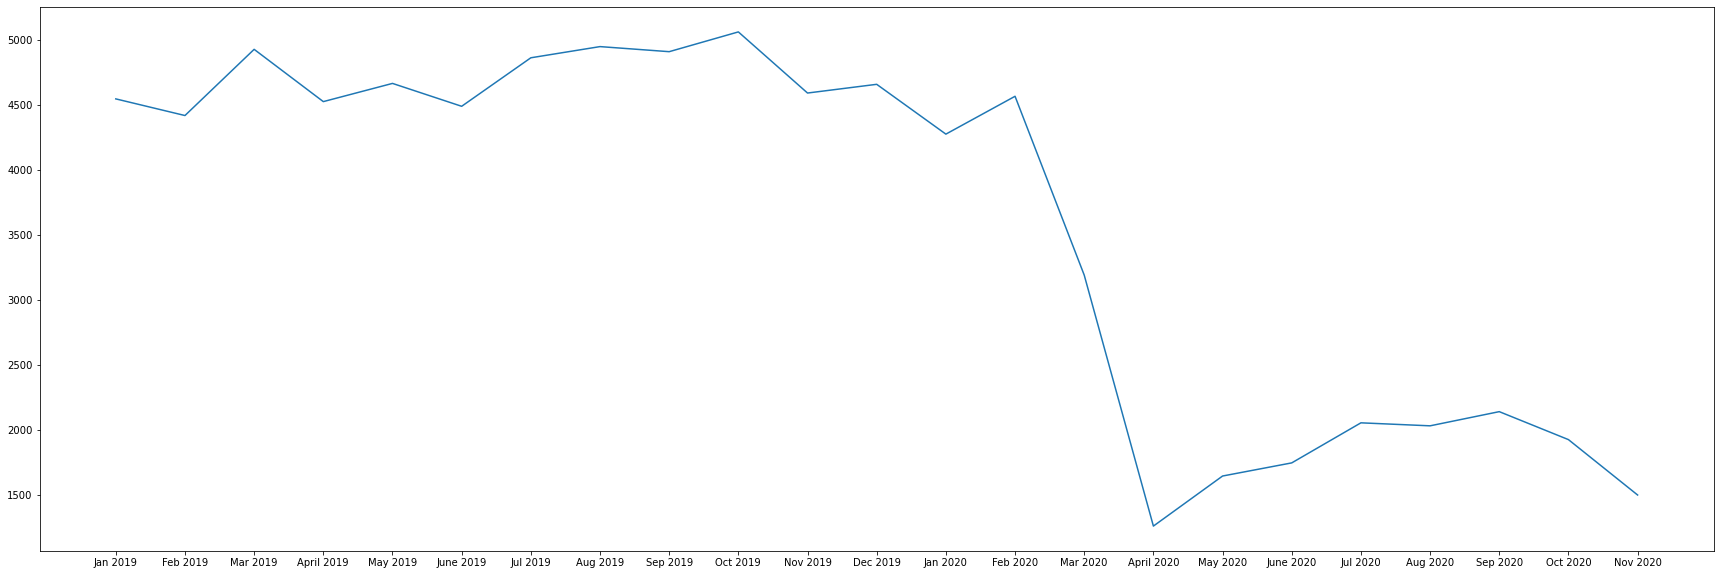

In [23]:
##this is a line graph of pre and during covid that we used on our website
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.plot(['Jan 2019', 'Feb 2019', 'Mar 2019', 'April 2019', 'May 2019', 'June 2019', 'Jul 2019',
         'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019','Jan 2020', 'Feb 2020', 'Mar 2020', 
          'April 2020', 'May 2020', 'June 2020', 'Jul 2020',
         'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020'], [4548, 4420, 4929, 4527, 4667, 4491, 4864, 4950, 4911, 5063,
                                                                      4593, 4660, 4277, 4568, 3193, 1263, 1648,
                                                                      1749, 2057, 2034, 2143, 1928, 1502])

plt.show()

In [24]:
##import geopandas
import geopandas as gpd

In [25]:
##i want to see LA neighborhoods, which will ultimately be used as base map.
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')


In [26]:
##remove columns i don't need.
neighborhoods =neighborhoods[['name','geometry']]
neighborhoods.head(1)

name                                           geometry
0  Acton  MULTIPOLYGON (((-118.20262 34.53899, -118.1894...

In [27]:
##make sure EPSG is 4326.
neighborhoods.set_crs(epsg=4326, inplace=True)

name                                           geometry
0              Acton  MULTIPOLYGON (((-118.20262 34.53899, -118.1894...
1    Adams-Normandie  MULTIPOLYGON (((-118.30901 34.03741, -118.3004...
2       Agoura Hills  MULTIPOLYGON (((-118.76193 34.16820, -118.7263...
3         Agua Dulce  MULTIPOLYGON (((-118.25468 34.55830, -118.2555...
4           Alhambra  MULTIPOLYGON (((-118.12175 34.10504, -118.1168...
..               ...                                                ...
267      Willowbrook  MULTIPOLYGON (((-118.23005 33.92809, -118.2280...
268       Wilmington  MULTIPOLYGON (((-118.22476 33.82461, -118.2245...
269   Windsor Square  MULTIPOLYGON (((-118.31371 34.07631, -118.3138...
270         Winnetka  MULTIPOLYGON (((-118.56221 34.23150, -118.5621...
271   Woodland Hills  MULTIPOLYGON (((-118.57569 34.18822, -118.5736...

[272 rows x 2 columns]

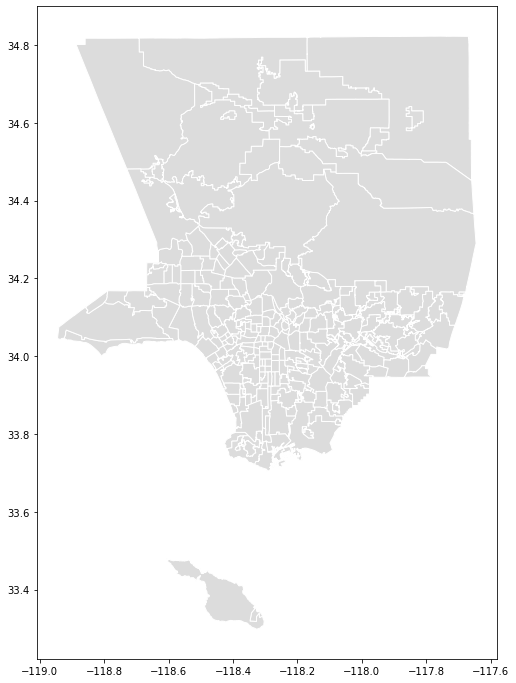

In [28]:
##plot the LA neighborhoods to see what it will look like
ax=neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

In [29]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata
import matplotlib.pyplot as plt

In [30]:
##import my pre-covid 19 data as a CSV
dfx = pd.read_csv('Pre-Covid19_Data_Trimmed.csv') 

In [31]:
##do some data exploration
dfx.shape

(68110, 16)

In [32]:
list(dfx)

['Unnamed: 0',
 'Date_Occurred',
 'Time_Occurred',
 'Area_ID',
 'Area_Name',
 'MO_Codes',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Address',
 'Cross_Street',
 'Location',
 'Latitude',
 'Longitude',
 'Month',
 'Year']

In [33]:
##make the dataframe into a geodataframe and make sure it is EGPS 4326
traffic = gpd.GeoDataFrame(dfx, geometry=gpd.points_from_xy(dfx.Longitude, dfx.Latitude))
traffic.set_crs(epsg=4326, inplace=True)

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID    Area_Name  \
0               0    2019-01-01           1033        7     Wilshire   
1               1    2019-01-01            200       13       Newton   
2               2    2019-01-01           2250       14      Pacific   
3               3    2019-01-01           2130        8      West LA   
4               4    2019-01-01            240       16     Foothill   
...           ...           ...            ...      ...          ...   
68105       68105    2020-03-18             25        3    Southwest   
68106       68106    2020-03-18           1500       12  77th Street   
68107       68107    2020-03-18           1510       18    Southeast   
68108       68108    2020-03-18           1740        3    Southwest   
68109       68109    2020-03-18           1445       10  West Valley   

                                           MO_Codes  Victim_Age Victim_Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0       Male   
1                     3101 3401 3701 3004 3030 3036        49.0     Female   
2      3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0       Male   
3           3004 3025 3035 3036 3101 3401 3701 4027        52.0       Male   
4           3037 3039 3006 3028 3101 3401 3701 4026        50.0       Male   
...                                             ...         ...        ...   
68105                                           NaN        45.0     Female   
68106                 4012 3037 3004 3026 3029 3101        40.0       Male   
68107                 4025 3037 3004 3028 3030 3101        23.0       Male   
68108                                           NaN        38.0     Female   
68109                                           NaN        40.0     Female   

                 Victim_Descent                             Address  \
0                         White                            CRENSHAW   
1                         Black     59TH                         ST   
2                         White                           VICKSBURG   
3      Hispanic, Latin, Mexican     OVERLAND                     AV   
4      Hispanic, Latin, Mexican     FAIR                         AV   
...                         ...                                 ...   
68105  Hispanic, Latin, Mexican     WESTERN                      AV   
68106                     Black  S  WESTERN                      AV   
68107  Hispanic, Latin, Mexican     MONA                         BL   
68108  Hispanic, Latin, Mexican  W  VERNON                       AV   
68109                     White     VANOWEN                      ST   

                          Cross_Street              Location  Latitude  \
0                           WASHINGTON  (34.0399, -118.3311)   34.0399   
1                             BROADWAY  (33.9869, -118.2783)   33.9869   
2                              CENTURY   (33.942, -118.4095)   33.9420   
3      NATIONAL                     BL  (34.0325, -118.4176)   34.0325   
4      ARMINTA                      ST  (34.2135, -118.3747)   34.2135   
...                                ...                   ...       ...   
68105  42ND                         PL  (34.0061, -118.3089)   34.0061   
68106  81ST                         ST   (33.9655, -118.309)   33.9655   
68107  112TH                        ST   (33.939, -118.2314)   33.9390   
68108  DENKER                       AV  (34.0037, -118.3045)   34.0037   
68109  VANALDEN                     AV  (34.1939, -118.5491)   34.1939   

       Longitude  Month  Year                     geometry  
0      -118.3311      1  2019  POINT (-118.33110 34.03990)  
1      -118.2783      1  2019  POINT (-118.27830 33.98690)  
2      -118.4095      1  2019  POINT (-118.40950 33.94200)  
3      -118.4176      1  2019  POINT (-118.41760 34.03250)  
4      -118.3747      1  2019  POINT (-118.37470 34.21350)  
...          ...    ...   ...                          ...  
68105  -118.3089      3  2020  POINT

In [34]:
traffic.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      68110 non-null  int64   
 1   Date_Occurred   68110 non-null  object  
 2   Time_Occurred   68110 non-null  int64   
 3   Area_ID         68110 non-null  int64   
 4   Area_Name       68110 non-null  object  
 5   MO_Codes        66068 non-null  object  
 6   Victim_Age      62732 non-null  float64 
 7   Victim_Sex      66431 non-null  object  
 8   Victim_Descent  66185 non-null  object  
 9   Address         68110 non-null  object  
 10  Cross_Street    63952 non-null  object  
 11  Location        68110 non-null  object  
 12  Latitude        68110 non-null  float64 
 13  Longitude       68110 non-null  float64 
 14  Month           68110 non-null  int64   
 15  Year            68110 non-null  int64   
 16  geometry        68110 non-null  geometry
dtypes: f

<ipython-input-34-3518bd2ecbbb>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  traffic.info(verbose=True, null_counts=True)


In [35]:
##there are some coordinates that are 0,0 which are causing me issues. i will filter these out.
traffic1= (traffic[traffic["Latitude"] >= 33])
traffic1.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 68104 entries, 0 to 68109
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      68104 non-null  int64   
 1   Date_Occurred   68104 non-null  object  
 2   Time_Occurred   68104 non-null  int64   
 3   Area_ID         68104 non-null  int64   
 4   Area_Name       68104 non-null  object  
 5   MO_Codes        66062 non-null  object  
 6   Victim_Age      62727 non-null  float64 
 7   Victim_Sex      66425 non-null  object  
 8   Victim_Descent  66179 non-null  object  
 9   Address         68104 non-null  object  
 10  Cross_Street    63946 non-null  object  
 11  Location        68104 non-null  object  
 12  Latitude        68104 non-null  float64 
 13  Longitude       68104 non-null  float64 
 14  Month           68104 non-null  int64   
 15  Year            68104 non-null  int64   
 16  geometry        68104 non-null  geometry
dtypes: f

<ipython-input-35-86a28198d7ec>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  traffic1.info(verbose=True, null_counts=True)


In [36]:
##confirm that i was able to drop the 0,0 coordinates from the original dataset
traffic1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 68104 entries, 0 to 68109
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      68104 non-null  int64   
 1   Date_Occurred   68104 non-null  object  
 2   Time_Occurred   68104 non-null  int64   
 3   Area_ID         68104 non-null  int64   
 4   Area_Name       68104 non-null  object  
 5   MO_Codes        66062 non-null  object  
 6   Victim_Age      62727 non-null  float64 
 7   Victim_Sex      66425 non-null  object  
 8   Victim_Descent  66179 non-null  object  
 9   Address         68104 non-null  object  
 10  Cross_Street    63946 non-null  object  
 11  Location        68104 non-null  object  
 12  Latitude        68104 non-null  float64 
 13  Longitude       68104 non-null  float64 
 14  Month           68104 non-null  int64   
 15  Year            68104 non-null  int64   
 16  geometry        68104 non-null  geometry
dtypes: f

<AxesSubplot:>

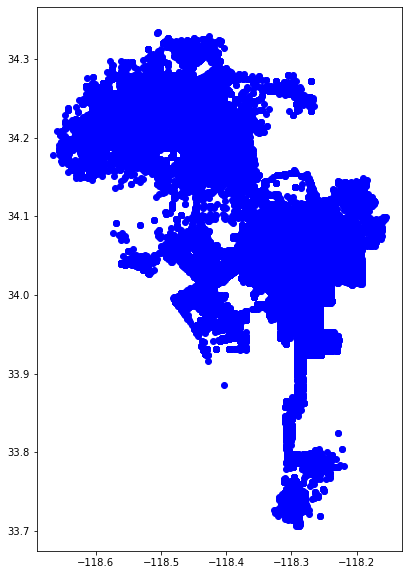

In [37]:
##plot the traffic collisions
traffic1.plot(figsize=(30,10), color='blue')

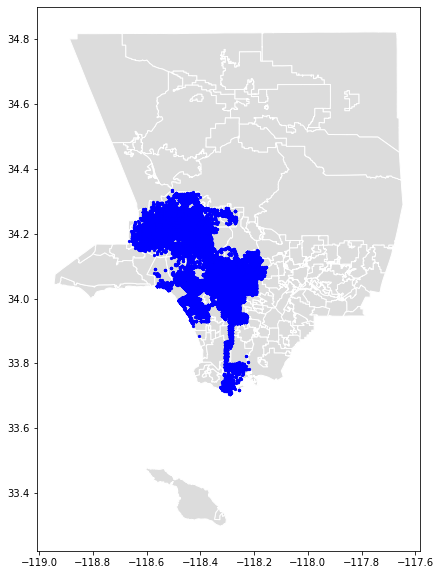

In [38]:
##now i will try to overlay the two datasets

##neighborhooods layer will be my "base"
base = neighborhoods.plot(figsize=(30,10),color='gainsboro', edgecolor='white')

##the layer that will go on top will be traffic collision points
ax = traffic1.plot(ax = base, color='blue', markersize=5)

In [39]:
##check total bounds so i can make the map more zoomed in
traffic1.geometry.total_bounds

array([-118.6652,   33.7065, -118.1554,   34.3343])

In [40]:
minx, miny, maxx, maxy = traffic1.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-118.6652
-118.1554
33.7065
34.3343


<AxesSubplot:>

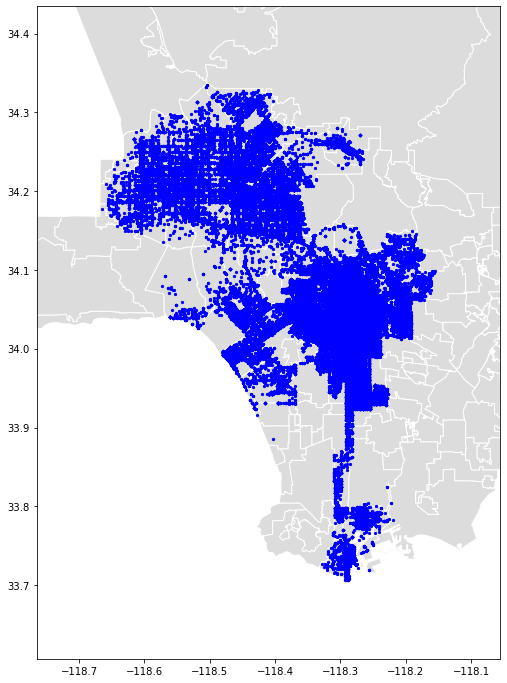

In [41]:
##use the bounding box coordinates to set the x and y limits
base = neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = traffic1.plot(ax=base, marker='o', color='blue', markersize=5)
ax.set_xlim(minx - .1, maxx + .1) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - .1, maxy + .1)
ax

In [42]:
##join the data
join = gpd.sjoin(neighborhoods,
                 traffic1,
                 how='right')

In [43]:
join.head()

index_left         name  Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID  \
0       146.0     Mid-City           0    2019-01-01           1033        7   
1        80.0     Florence           1    2019-01-01            200       13   
2       252.0  Westchester           2    2019-01-01           2250       14   
3       182.0  Rancho Park           3    2019-01-01           2130        8   
4       218.0   Sun Valley           4    2019-01-01            240       16   

  Area_Name                                      MO_Codes  Victim_Age  \
0  Wilshire  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0   
1    Newton                 3101 3401 3701 3004 3030 3036        49.0   
2   Pacific  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0   
3   West LA       3004 3025 3035 3036 3101 3401 3701 4027        52.0   
4  Foothill       3037 3039 3006 3028 3101 3401 3701 4026        50.0   

  Victim_Sex            Victim_Descent                          Address  \
0       Male                     White                         CRENSHAW   
1     Female                     Black  59TH                         ST   
2       Male                     White                        VICKSBURG   
3       Male  Hispanic, Latin, Mexican  OVERLAND                     AV   
4       Male  Hispanic, Latin, Mexican  FAIR                         AV   

                      Cross_Street              Location  Latitude  Longitude  \
0                       WASHINGTON  (34.0399, -118.3311)   34.0399  -118.3311   
1                         BROADWAY  (33.9869, -118.2783)   33.9869  -118.2783   
2                          CENTURY   (33.942, -118.4095)   33.9420  -118.4095   
3  NATIONAL                     BL  (34.0325, -118.4176)   34.0325  -118.4176   
4  ARMINTA                      ST  (34.2135, -118.3747)   34.2135  -118.3747   

   Month  Year                     geometry  
0      1  2019  POINT (-118.33110 34.03990)  
1      1  2019  POINT (-118.27830 33.98690)  
2      1  2019  POINT (-118.40950 33.94200)  
3      1  2019  POINT (-118.41760 34.03250)  
4      1  2019  POINT (-118.37470 34.21350)

In [44]:
##redefine the new joined dataset
traffic_collisions_by_neighborhoods = join.name.value_counts().rename_axis('name').reset_index(name='traffic_collision_count')

In [45]:
traffic_collisions_by_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   name                     149 non-null    object
 1   traffic_collision_count  149 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [46]:
##add in a new column of average traffic collisions per day
traffic_collisions_by_neighborhoods['avg_traffic_collisions_per_day'] = traffic_collisions_by_neighborhoods['traffic_collision_count']/442 
traffic_collisions_by_neighborhoods.head()

name  traffic_collision_count  avg_traffic_collisions_per_day
0   Downtown                     3455                        7.816742
1   Van Nuys                     2212                        5.004525
2  Hollywood                     2048                        4.633484
3  Koreatown                     1804                        4.081448
4   Westlake                     1660                        3.755656

<AxesSubplot:ylabel='name'>

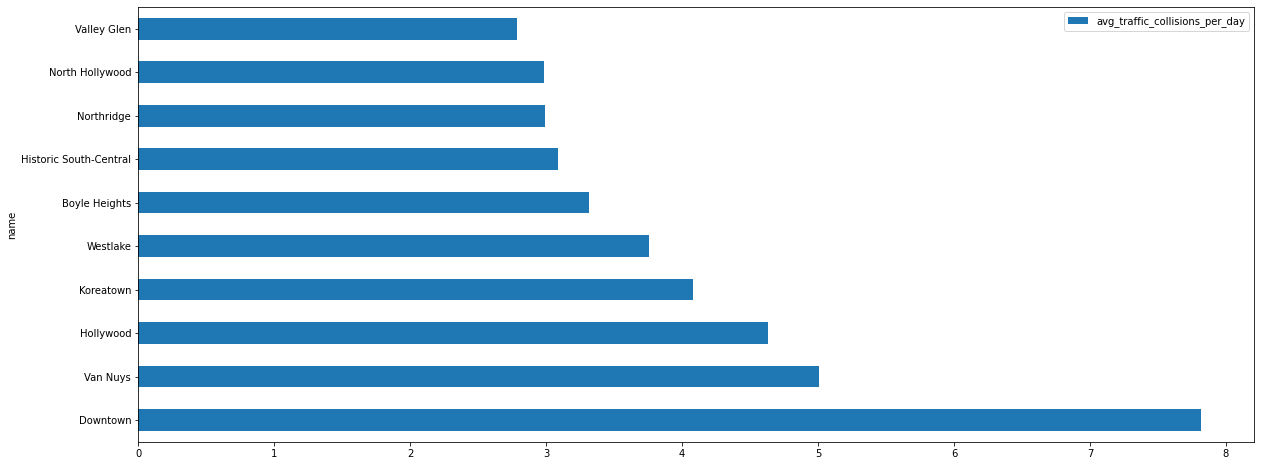

In [47]:
##do a bar chart to see the top 10 neighborhoods with the highest traffic collision rates
traffic_collisions_by_neighborhoods[:10].plot.barh(figsize=(20,8),x='name',y='avg_traffic_collisions_per_day')

In [48]:
##join the summary table back to the neighborhood geodatabase
neighborhoods=neighborhoods.merge(traffic_collisions_by_neighborhoods,on='name')

In [49]:
## now neighborhood table now has a count column
neighborhoods.head()

name                                           geometry  \
0    Adams-Normandie  MULTIPOLYGON (((-118.30901 34.03741, -118.3004...   
1           Alhambra  MULTIPOLYGON (((-118.12175 34.10504, -118.1168...   
2             Arleta  MULTIPOLYGON (((-118.42202 34.22410, -118.4228...   
3  Arlington Heights  MULTIPOLYGON (((-118.31591 34.05261, -118.3134...   
4             Athens  MULTIPOLYGON (((-118.29166 33.93096, -118.2915...   

   traffic_collision_count  avg_traffic_collisions_per_day  
0                      294                        0.665158  
1                        1                        0.002262  
2                      293                        0.662896  
3                      406                        0.918552  
4                        9                        0.020362

In [50]:
neighborhoods.to_csv('Pre-Covid19_Data_Avg_Traffic_Collisions_Per_Day.csv')

In [51]:
import contextily as ctx

In [52]:
neighborhoods = neighborhoods.to_crs(epsg=3857)


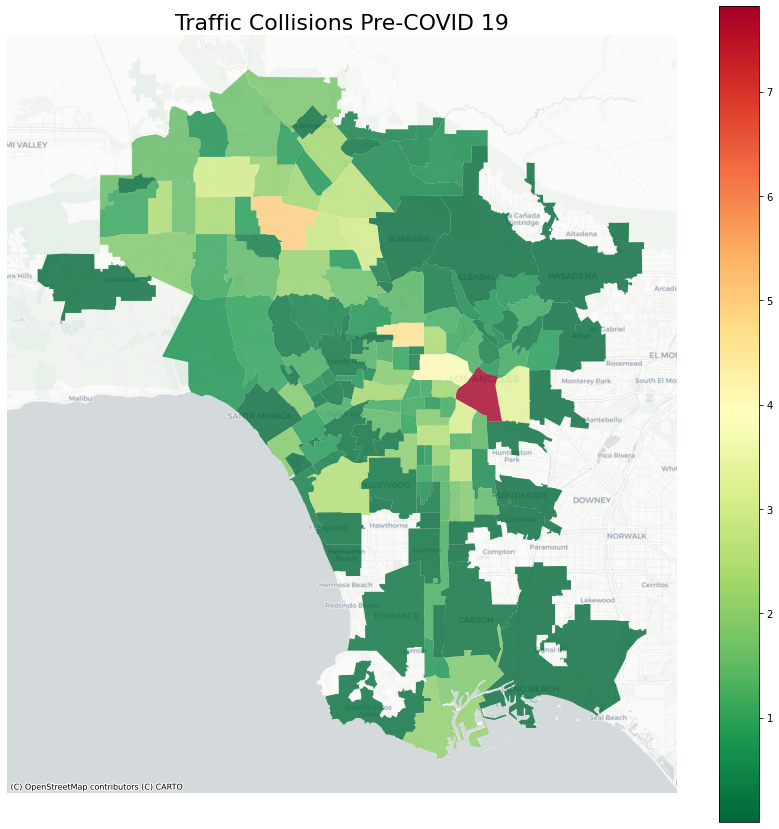

In [53]:
ax = neighborhoods.plot(figsize=(15,15),
                        column='avg_traffic_collisions_per_day',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('Traffic Collisions Pre-COVID 19',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [54]:
import plotly.express as px

In [55]:
##reproject to web mercator
neighborhoods = neighborhoods.to_crs(epsg=4326)

In [56]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
##check the total bounds of the dataset
minx, miny, maxx, maxy = neighborhoods.geometry.total_bounds

In [58]:
center_lat=(maxy-miny)/2+miny
center_lat

34.02092235009106

In [59]:
center_lon=(maxx-minx)/2+minx
center_lon

-118.40011100000015

In [60]:
##this is an interactive map showing the average traffic collisions per day
map = px.choropleth_mapbox(neighborhoods, 
                           geojson=neighborhoods.geometry, 
                           locations=neighborhoods.index, 
                           color='avg_traffic_collisions_per_day',
                           color_continuous_scale="rdylgn_r",
                           mapbox_style="carto-positron",
                           zoom=9, 
                           center = {"lat": center_lat, "lon": center_lon},
                           hover_name=neighborhoods.name,
                           opacity=0.5,
                           range_color=(0, 4),
                          )
map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
map.show()

In [61]:
map.write_html("traffic_rates1_Pre-COVID.html")

<AxesSubplot:title={'center':'Victim Descent in Traffic Collisions: Downtown, Los Angeles'}>

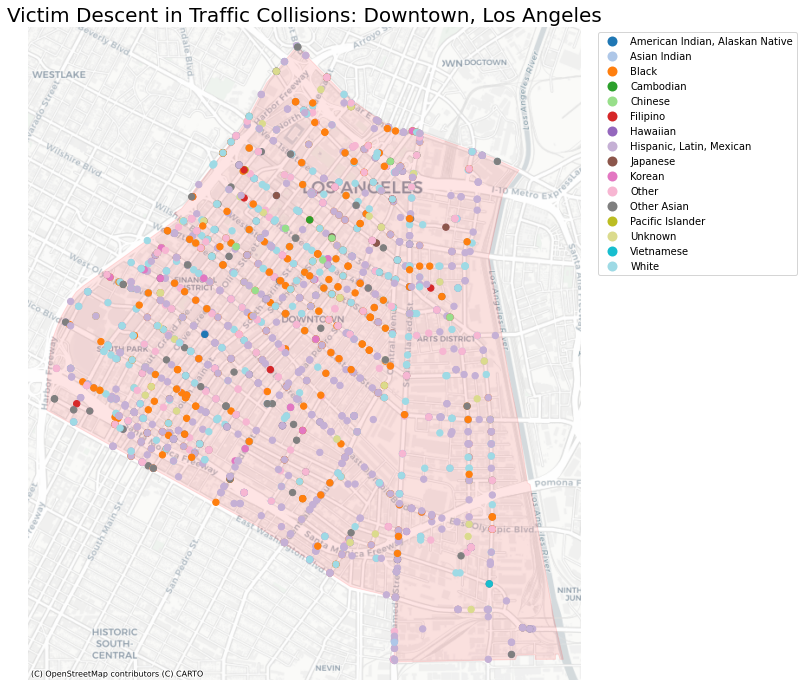

In [62]:
##start function process. need to make sure traffic1 and neighborhoods are both 3857 since that's what contextily uses.
traffic1 =traffic.to_crs(epsg=3857)
neighborhoods = neighborhoods.to_crs(epsg=3857)
    
# subset the neighborhoods geodataframe for a single neighborhood
neighborhood = neighborhoods[neighborhoods.name=='Downtown']

#set x and y limits
minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

##join neighborhoods and traffic1 info
collisions_in_neighborhood = gpd.sjoin(traffic1,neighborhood,how='inner')

#neighborhood is base layer
base = neighborhood.plot(figsize=(12,12),
                         color='red', 
                         edgecolor='red',
                         alpha=0.1)

#add collision data and call for "victim sex"
ax = collisions_in_neighborhood.plot(ax=base, 
                                column='Victim_Descent', 
                                markersize=40, 
                                legend=True,
                                cmap='tab20',
                                legend_kwds={
                                   'loc': 'upper right',
                                   'bbox_to_anchor':(1.4,1)
                                }                  # this puts the legend to the side
                            )

# set the map extent to the extent of the neighborhood bounds
ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 200, maxy + 200)

# turn off the axis
ax.axis('off')

# add a title
ax.set_title('Victim Descent in Traffic Collisions: '+neighborhood.name.values[0]+', Los Angeles',fontsize=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
ax

In [63]:
def map_collision_descent_by_neighborhood(place='Downtown'):
    # subset the neighborhoods geodataframe for a single neighborhood
    neighborhood = neighborhoods[neighborhoods.name==place]

    #set x and y limits
    minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

    ##join neighborhoods and traffic1 info
    collisions_in_neighborhood = gpd.sjoin(traffic1,neighborhood,how='inner')

    #neighborhood is base layer
    base = neighborhood.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.1)

    #add collision data and call for "victim sex"
    ax = collisions_in_neighborhood.plot(ax=base, 
                                    column='Victim_Descent', 
                                    markersize=40, 
                                    legend=True,
                                    cmap='tab20',
                                    legend_kwds={
                                       'loc': 'upper right',
                                       'bbox_to_anchor':(1.4,1)
                                    }                  # this puts the legend to the side
                                )

    # set the map extent to the extent of the neighborhood bounds
    ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
    ax.set_ylim(miny - 200, maxy + 200)

    # turn off the axis
    ax.axis('off')

    # add a title
    ax.set_title('Victim Descent in Traffic Collisions: '+neighborhood.name.values[0]+', Los Angeles',fontsize=20)
    
    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    ax

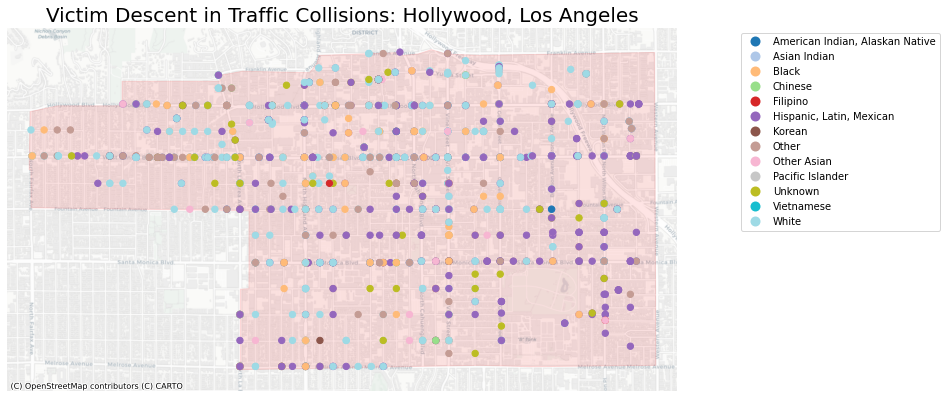

In [64]:
map_collision_descent_by_neighborhood(place='Hollywood')

Date_Occurred  Time_Occurred  Area_ID Area_Name  \
91     2019-01-01           1930        7  Wilshire   
215    2019-01-02           2310        7  Wilshire   
219    2019-01-02           1500        7  Wilshire   
272    2019-01-03           1710        7  Wilshire   
357    2019-01-03            840        7  Wilshire   

                                              MO_Codes  Victim_Age Victim_Sex  \
91        3006 3028 3030 3035 3037 3101 3401 3701 4027        30.0     Female   
215  3004 3024 3029 3034 3036 3101 3401 3701 4027 3002        26.0       Male   
219            3004 3026 3035 3037 3101 3401 3701 4027        36.0     Female   
272       3101 3004 3026 3029 3035 3037 3401 3701 4027        41.0       Male   
357       3004 3025 3029 3035 3036 3101 3401 3701 4027        35.0     Female   

               Victim_Descent                          Address  \
91   Hispanic, Latin, Mexican  LA BREA                      AV   
215  Hispanic, Latin, Mexican                          LA BREA   
219  Hispanic, Latin, Mexican  RIMPAU                       BL   
272  Hispanic, Latin, Mexican  ELECTRIC                     DR   
357  Hispanic, Latin, Mexican                           VENICE   

                           Cross_Street              Location Latitude  \
91      WASHINGTON                   BL  (34.0404, -118.3475)  34.0404   
215                             BEVERLY  (34.0762, -118.3441)  34.0762   
219     3RD                          ST  (34.0667, -118.3303)  34.0667   
272  E  FAIRFAX                      AV  (34.0359, -118.3692)  34.0359   
357     3RD                          AV  (34.0436, -118.3201)  34.0436   

     Longitude  Month  Year  
91   -118.3475      1  2019  
215  -118.3441      1  2019  
219  -118.3303      1  2019  
272  -118.3692      1  2019  
357  -118.3201      1  2019

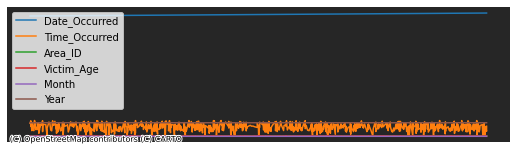

In [66]:
##tried to see if there was a way we could save this onto our storymaps but looks like no.

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

##i want to create an interactive map with two drop-downs: race and area
top_25_race = df1.Victim_Descent.value_counts().head(25).index.tolist()

@interact

##function argument will become interactive
def traffic_collisions_by(race=top_25_race,
                         area = df1.Area_Name.unique().tolist()):
    
    ##table
    display(df1[(df1.Victim_Descent == race)&(df1.Area_Name == area)].head()) 

    ##map
    ax = df1[(df1.Victim_Descent == race)&(df1.Area_Name == area)].plot(figsize=(9,9), markersize=10)
    
    ##axis
    ax.axis('off')

    ##include a basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)

In [70]:
##this csv is pre-covid data with MO_Codes contents that contain the MO codes that we determined we wanted to look at, only.
mo = pd.read_csv('TrafficData_MO_Codes_PreCOVID.csv') 

In [71]:
mo.shape

(60400, 18)

In [72]:
mo.head(3)

DR Number Date Reported Date Occurred  Time Occurred  Area ID Area Name  \
0  200704291    01/07/2020    01/01/2019           1033        7  Wilshire   
1  191304041    01/01/2019    01/01/2019            200       13    Newton   
2  191418727    08/25/2019    01/01/2019           2250       14   Pacific   

   Reporting District  Crime Code Crime Code Description  \
0                 793         997      TRAFFIC COLLISION   
1                1383         997      TRAFFIC COLLISION   
2                1494         997      TRAFFIC COLLISION   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                 3101 3401 3701 3004 3030 3036        49.0          F   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0          M   

  Victim Descent  Premise Code Premise Description  \
0              W         101.0              STREET   
1              B         101.0              STREET   
2              W         101.0              STREET   

                           Address Cross Street              Location  
0                         CRENSHAW   WASHINGTON  (34.0399, -118.3311)  
1  59TH                         ST     BROADWAY  (33.9869, -118.2783)  
2                        VICKSBURG      CENTURY   (33.942, -118.4095)

In [73]:
###there are no empty columns. note which columns I want to drop

mo_columns_to_drop =['DR Number', 'Time Occurred', 'Area ID', 'Address', 'Cross Street', 'Date Reported', 'Reporting District', 'Crime Code', 'Crime Code Description', 'Premise Code', 'Premise Description']

mo= mo.drop(mo_columns_to_drop,axis=1)

mo.head()


Date Occurred Area Name                                      MO Codes  \
0    01/01/2019  Wilshire  3004 3028 3030 3037 3101 3401 3701 4027 3035   
1    01/01/2019    Newton                 3101 3401 3701 3004 3030 3036   
2    01/01/2019   Pacific  3003 3025 3029 3035 3037 3101 3401 3701 4027   
3    01/01/2019   West LA       3004 3025 3035 3036 3101 3401 3701 4027   
4    01/01/2019  Foothill       3037 3039 3006 3028 3101 3401 3701 4026   

   Victim Age Victim Sex Victim Descent              Location  
0        23.0          M              W  (34.0399, -118.3311)  
1        49.0          F              B  (33.9869, -118.2783)  
2        33.0          M              W   (33.942, -118.4095)  
3        52.0          M              H  (34.0325, -118.4176)  
4        50.0          M              H  (34.2135, -118.3747)

In [74]:
##rename columns
mo.columns = ['Date_Occurred',
 'Area_Name',
 'MO_Codes',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Location']
mo.head(1)

Date_Occurred Area_Name                                      MO_Codes  \
0    01/01/2019  Wilshire  3004 3028 3030 3037 3101 3401 3701 4027 3035   

   Victim_Age Victim_Sex Victim_Descent              Location  
0        23.0          M              W  (34.0399, -118.3311)

In [75]:
##update the location so that there are separate lat and long columns
mo.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)

mo = pd.concat((mo, mo.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)), axis=1)
mo.head(3)

Date_Occurred Area_Name                                      MO_Codes  \
0    01/01/2019  Wilshire  3004 3028 3030 3037 3101 3401 3701 4027 3035   
1    01/01/2019    Newton                 3101 3401 3701 3004 3030 3036   
2    01/01/2019   Pacific  3003 3025 3029 3035 3037 3101 3401 3701 4027   

   Victim_Age Victim_Sex Victim_Descent              Location Latitude  \
0        23.0          M              W  (34.0399, -118.3311)  34.0399   
1        49.0          F              B  (33.9869, -118.2783)  33.9869   
2        33.0          M              W   (33.942, -118.4095)   33.942   

   Longitude  
0  -118.3311  
1  -118.2783  
2  -118.4095

In [76]:
## trying to replace the space with comma in the MO_Codes column using str.format() 
mo.MO_Codes = [x.replace(" ", ", ") for x in mo.MO_Codes]

In [77]:
##it worked, this looks better
mo.MO_Codes

0        3004, 3028, 3030, 3037, 3101, 3401, 3701, 4027...
1                       3101, 3401, 3701, 3004, 3030, 3036
2        3003, 3025, 3029, 3035, 3037, 3101, 3401, 3701...
3           3004, 3025, 3035, 3036, 3101, 3401, 3701, 4027
4           3037, 3039, 3006, 3028, 3101, 3401, 3701, 4026
                               ...                        
60395                         4003, 3036, 3008, 3024, 3101
60396                         4003, 3036, 3004, 3011, 3028
60397                               4003, 3001, 3028, 3030
60398                   4012, 3037, 3004, 3026, 3029, 3101
60399                   4025, 3037, 3004, 3028, 3030, 3101
Name: MO_Codes, Length: 60400, dtype: object

In [78]:
mo.head(3)

Date_Occurred Area_Name                                           MO_Codes  \
0    01/01/2019  Wilshire  3004, 3028, 3030, 3037, 3101, 3401, 3701, 4027...   
1    01/01/2019    Newton                 3101, 3401, 3701, 3004, 3030, 3036   
2    01/01/2019   Pacific  3003, 3025, 3029, 3035, 3037, 3101, 3401, 3701...   

   Victim_Age Victim_Sex Victim_Descent              Location Latitude  \
0        23.0          M              W  (34.0399, -118.3311)  34.0399   
1        49.0          F              B  (33.9869, -118.2783)  33.9869   
2        33.0          M              W   (33.942, -118.4095)   33.942   

   Longitude  
0  -118.3311  
1  -118.2783  
2  -118.4095

In [79]:
##now i am trying to add quotes so that this will be classified as a list, instead of a string.
##this code adds quotes to the beginning and end of each cell
mo['MO_Codes_with_quotes'] = mo['MO_Codes'].apply(lambda x: '"' + str(x) + '"')
print(mo.MO_Codes_with_quotes)

0        "3004, 3028, 3030, 3037, 3101, 3401, 3701, 402...
1                     "3101, 3401, 3701, 3004, 3030, 3036"
2        "3003, 3025, 3029, 3035, 3037, 3101, 3401, 370...
3         "3004, 3025, 3035, 3036, 3101, 3401, 3701, 4027"
4         "3037, 3039, 3006, 3028, 3101, 3401, 3701, 4026"
                               ...                        
60395                       "4003, 3036, 3008, 3024, 3101"
60396                       "4003, 3036, 3004, 3011, 3028"
60397                             "4003, 3001, 3028, 3030"
60398                 "4012, 3037, 3004, 3026, 3029, 3101"
60399                 "4025, 3037, 3004, 3028, 3030, 3101"
Name: MO_Codes_with_quotes, Length: 60400, dtype: object


In [80]:
##this code will add quotations within each MO code
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

In [81]:
mo['MO_Codes_with_quotes'] = mo['MO_Codes_with_quotes'].apply(clean_alt_list)

In [82]:
##verify that it worked - it did.
print(mo.MO_Codes_with_quotes)

0        "3004","3028","3030","3037","3101","3401","370...
1                "3101","3401","3701","3004","3030","3036"
2        "3003","3025","3029","3035","3037","3101","340...
3        "3004","3025","3035","3036","3101","3401","370...
4        "3037","3039","3006","3028","3101","3401","370...
                               ...                        
60395                   "4003","3036","3008","3024","3101"
60396                   "4003","3036","3004","3011","3028"
60397                          "4003","3001","3028","3030"
60398            "4012","3037","3004","3026","3029","3101"
60399            "4025","3037","3004","3028","3030","3101"
Name: MO_Codes_with_quotes, Length: 60400, dtype: object


In [84]:
##i made a new csv file with just the MOs I needed in an attempt to see if this would work better than before
##but there was no difference.
##this is my statistical analysis
mo_clean_quotes = pd.read_csv('MO_Quotes_Clean.csv')  

In [85]:
mo_clean_quotes['MO_Codes_with_quotes'] = mo_clean_quotes.MO_Codes_with_quotes.apply(lambda x: x[1:-1].split(','))
mo_clean_quotes.MO_Codes_with_quotes[0]

["'3004'",
 " '3028'",
 " '3030'",
 " '3037'",
 " '3101'",
 " '3401'",
 " '3701'",
 " '4027'",
 " '3035'"]

In [86]:
##confirm that the MO codes are now a list. I had issues with this where it was noted as string or tupple, before.
for i, l in enumerate(mo_clean_quotes["MO_Codes_with_quotes"]):
 print('list',i,'is',type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

list 572 is <class 'list'>
list 573 is <class 'list'>
list 574 is <class 'list'>
list 575 is <class 'list'>
list 576 is <class 'list'>
list 577 is <class 'list'>
list 578 is <class 'list'>
list 579 is <class 'list'>
list 580 is <class 'list'>
list 581 is <class 'list'>
list 582 is <class 'list'>
list 583 is <class 'list'>
list 584 is <class 'list'>
list 585 is <class 'list'>
list 586 is <class 'list'>
list 587 is <class 'list'>
list 588 is <class 'list'>
list 589 is <class 'list'>
list 590 is <class 'list'>
list 591 is <class 'list'>
list 592 is <class 'list'>
list 593 is <class 'list'>
list 594 is <class 'list'>
list 595 is <class 'list'>
list 596 is <class 'list'>
list 597 is <class 'list'>
list 598 is <class 'list'>
list 599 is <class 'list'>
list 600 is <class 'list'>
list 601 is <class 'list'>
list 602 is <class 'list'>
list 603 is <class 'list'>
list 604 is <class 'list'>
list 605 is <class 'list'>
list 606 is <class 'list'>
list 607 is <class 'list'>
list 608 is <class 'list'>
l

list 1197 is <class 'list'>
list 1198 is <class 'list'>
list 1199 is <class 'list'>
list 1200 is <class 'list'>
list 1201 is <class 'list'>
list 1202 is <class 'list'>
list 1203 is <class 'list'>
list 1204 is <class 'list'>
list 1205 is <class 'list'>
list 1206 is <class 'list'>
list 1207 is <class 'list'>
list 1208 is <class 'list'>
list 1209 is <class 'list'>
list 1210 is <class 'list'>
list 1211 is <class 'list'>
list 1212 is <class 'list'>
list 1213 is <class 'list'>
list 1214 is <class 'list'>
list 1215 is <class 'list'>
list 1216 is <class 'list'>
list 1217 is <class 'list'>
list 1218 is <class 'list'>
list 1219 is <class 'list'>
list 1220 is <class 'list'>
list 1221 is <class 'list'>
list 1222 is <class 'list'>
list 1223 is <class 'list'>
list 1224 is <class 'list'>
list 1225 is <class 'list'>
list 1226 is <class 'list'>
list 1227 is <class 'list'>
list 1228 is <class 'list'>
list 1229 is <class 'list'>
list 1230 is <class 'list'>
list 1231 is <class 'list'>
list 1232 is <class 

list 1822 is <class 'list'>
list 1823 is <class 'list'>
list 1824 is <class 'list'>
list 1825 is <class 'list'>
list 1826 is <class 'list'>
list 1827 is <class 'list'>
list 1828 is <class 'list'>
list 1829 is <class 'list'>
list 1830 is <class 'list'>
list 1831 is <class 'list'>
list 1832 is <class 'list'>
list 1833 is <class 'list'>
list 1834 is <class 'list'>
list 1835 is <class 'list'>
list 1836 is <class 'list'>
list 1837 is <class 'list'>
list 1838 is <class 'list'>
list 1839 is <class 'list'>
list 1840 is <class 'list'>
list 1841 is <class 'list'>
list 1842 is <class 'list'>
list 1843 is <class 'list'>
list 1844 is <class 'list'>
list 1845 is <class 'list'>
list 1846 is <class 'list'>
list 1847 is <class 'list'>
list 1848 is <class 'list'>
list 1849 is <class 'list'>
list 1850 is <class 'list'>
list 1851 is <class 'list'>
list 1852 is <class 'list'>
list 1853 is <class 'list'>
list 1854 is <class 'list'>
list 1855 is <class 'list'>
list 1856 is <class 'list'>
list 1857 is <class 

list 2447 is <class 'list'>
list 2448 is <class 'list'>
list 2449 is <class 'list'>
list 2450 is <class 'list'>
list 2451 is <class 'list'>
list 2452 is <class 'list'>
list 2453 is <class 'list'>
list 2454 is <class 'list'>
list 2455 is <class 'list'>
list 2456 is <class 'list'>
list 2457 is <class 'list'>
list 2458 is <class 'list'>
list 2459 is <class 'list'>
list 2460 is <class 'list'>
list 2461 is <class 'list'>
list 2462 is <class 'list'>
list 2463 is <class 'list'>
list 2464 is <class 'list'>
list 2465 is <class 'list'>
list 2466 is <class 'list'>
list 2467 is <class 'list'>
list 2468 is <class 'list'>
list 2469 is <class 'list'>
list 2470 is <class 'list'>
list 2471 is <class 'list'>
list 2472 is <class 'list'>
list 2473 is <class 'list'>
list 2474 is <class 'list'>
list 2475 is <class 'list'>
list 2476 is <class 'list'>
list 2477 is <class 'list'>
list 2478 is <class 'list'>
list 2479 is <class 'list'>
list 2480 is <class 'list'>
list 2481 is <class 'list'>
list 2482 is <class 

list 3072 is <class 'list'>
list 3073 is <class 'list'>
list 3074 is <class 'list'>
list 3075 is <class 'list'>
list 3076 is <class 'list'>
list 3077 is <class 'list'>
list 3078 is <class 'list'>
list 3079 is <class 'list'>
list 3080 is <class 'list'>
list 3081 is <class 'list'>
list 3082 is <class 'list'>
list 3083 is <class 'list'>
list 3084 is <class 'list'>
list 3085 is <class 'list'>
list 3086 is <class 'list'>
list 3087 is <class 'list'>
list 3088 is <class 'list'>
list 3089 is <class 'list'>
list 3090 is <class 'list'>
list 3091 is <class 'list'>
list 3092 is <class 'list'>
list 3093 is <class 'list'>
list 3094 is <class 'list'>
list 3095 is <class 'list'>
list 3096 is <class 'list'>
list 3097 is <class 'list'>
list 3098 is <class 'list'>
list 3099 is <class 'list'>
list 3100 is <class 'list'>
list 3101 is <class 'list'>
list 3102 is <class 'list'>
list 3103 is <class 'list'>
list 3104 is <class 'list'>
list 3105 is <class 'list'>
list 3106 is <class 'list'>
list 3107 is <class 

list 3633 is <class 'list'>
list 3634 is <class 'list'>
list 3635 is <class 'list'>
list 3636 is <class 'list'>
list 3637 is <class 'list'>
list 3638 is <class 'list'>
list 3639 is <class 'list'>
list 3640 is <class 'list'>
list 3641 is <class 'list'>
list 3642 is <class 'list'>
list 3643 is <class 'list'>
list 3644 is <class 'list'>
list 3645 is <class 'list'>
list 3646 is <class 'list'>
list 3647 is <class 'list'>
list 3648 is <class 'list'>
list 3649 is <class 'list'>
list 3650 is <class 'list'>
list 3651 is <class 'list'>
list 3652 is <class 'list'>
list 3653 is <class 'list'>
list 3654 is <class 'list'>
list 3655 is <class 'list'>
list 3656 is <class 'list'>
list 3657 is <class 'list'>
list 3658 is <class 'list'>
list 3659 is <class 'list'>
list 3660 is <class 'list'>
list 3661 is <class 'list'>
list 3662 is <class 'list'>
list 3663 is <class 'list'>
list 3664 is <class 'list'>
list 3665 is <class 'list'>
list 3666 is <class 'list'>
list 3667 is <class 'list'>
list 3668 is <class 

list 4218 is <class 'list'>
list 4219 is <class 'list'>
list 4220 is <class 'list'>
list 4221 is <class 'list'>
list 4222 is <class 'list'>
list 4223 is <class 'list'>
list 4224 is <class 'list'>
list 4225 is <class 'list'>
list 4226 is <class 'list'>
list 4227 is <class 'list'>
list 4228 is <class 'list'>
list 4229 is <class 'list'>
list 4230 is <class 'list'>
list 4231 is <class 'list'>
list 4232 is <class 'list'>
list 4233 is <class 'list'>
list 4234 is <class 'list'>
list 4235 is <class 'list'>
list 4236 is <class 'list'>
list 4237 is <class 'list'>
list 4238 is <class 'list'>
list 4239 is <class 'list'>
list 4240 is <class 'list'>
list 4241 is <class 'list'>
list 4242 is <class 'list'>
list 4243 is <class 'list'>
list 4244 is <class 'list'>
list 4245 is <class 'list'>
list 4246 is <class 'list'>
list 4247 is <class 'list'>
list 4248 is <class 'list'>
list 4249 is <class 'list'>
list 4250 is <class 'list'>
list 4251 is <class 'list'>
list 4252 is <class 'list'>
list 4253 is <class 

list 4862 is <class 'list'>
list 4863 is <class 'list'>
list 4864 is <class 'list'>
list 4865 is <class 'list'>
list 4866 is <class 'list'>
list 4867 is <class 'list'>
list 4868 is <class 'list'>
list 4869 is <class 'list'>
list 4870 is <class 'list'>
list 4871 is <class 'list'>
list 4872 is <class 'list'>
list 4873 is <class 'list'>
list 4874 is <class 'list'>
list 4875 is <class 'list'>
list 4876 is <class 'list'>
list 4877 is <class 'list'>
list 4878 is <class 'list'>
list 4879 is <class 'list'>
list 4880 is <class 'list'>
list 4881 is <class 'list'>
list 4882 is <class 'list'>
list 4883 is <class 'list'>
list 4884 is <class 'list'>
list 4885 is <class 'list'>
list 4886 is <class 'list'>
list 4887 is <class 'list'>
list 4888 is <class 'list'>
list 4889 is <class 'list'>
list 4890 is <class 'list'>
list 4891 is <class 'list'>
list 4892 is <class 'list'>
list 4893 is <class 'list'>
list 4894 is <class 'list'>
list 4895 is <class 'list'>
list 4896 is <class 'list'>
list 4897 is <class 

list 5502 is <class 'list'>
list 5503 is <class 'list'>
list 5504 is <class 'list'>
list 5505 is <class 'list'>
list 5506 is <class 'list'>
list 5507 is <class 'list'>
list 5508 is <class 'list'>
list 5509 is <class 'list'>
list 5510 is <class 'list'>
list 5511 is <class 'list'>
list 5512 is <class 'list'>
list 5513 is <class 'list'>
list 5514 is <class 'list'>
list 5515 is <class 'list'>
list 5516 is <class 'list'>
list 5517 is <class 'list'>
list 5518 is <class 'list'>
list 5519 is <class 'list'>
list 5520 is <class 'list'>
list 5521 is <class 'list'>
list 5522 is <class 'list'>
list 5523 is <class 'list'>
list 5524 is <class 'list'>
list 5525 is <class 'list'>
list 5526 is <class 'list'>
list 5527 is <class 'list'>
list 5528 is <class 'list'>
list 5529 is <class 'list'>
list 5530 is <class 'list'>
list 5531 is <class 'list'>
list 5532 is <class 'list'>
list 5533 is <class 'list'>
list 5534 is <class 'list'>
list 5535 is <class 'list'>
list 5536 is <class 'list'>
list 5537 is <class 

list 6104 is <class 'list'>
list 6105 is <class 'list'>
list 6106 is <class 'list'>
list 6107 is <class 'list'>
list 6108 is <class 'list'>
list 6109 is <class 'list'>
list 6110 is <class 'list'>
list 6111 is <class 'list'>
list 6112 is <class 'list'>
list 6113 is <class 'list'>
list 6114 is <class 'list'>
list 6115 is <class 'list'>
list 6116 is <class 'list'>
list 6117 is <class 'list'>
list 6118 is <class 'list'>
list 6119 is <class 'list'>
list 6120 is <class 'list'>
list 6121 is <class 'list'>
list 6122 is <class 'list'>
list 6123 is <class 'list'>
list 6124 is <class 'list'>
list 6125 is <class 'list'>
list 6126 is <class 'list'>
list 6127 is <class 'list'>
list 6128 is <class 'list'>
list 6129 is <class 'list'>
list 6130 is <class 'list'>
list 6131 is <class 'list'>
list 6132 is <class 'list'>
list 6133 is <class 'list'>
list 6134 is <class 'list'>
list 6135 is <class 'list'>
list 6136 is <class 'list'>
list 6137 is <class 'list'>
list 6138 is <class 'list'>
list 6139 is <class 

list 6814 is <class 'list'>
list 6815 is <class 'list'>
list 6816 is <class 'list'>
list 6817 is <class 'list'>
list 6818 is <class 'list'>
list 6819 is <class 'list'>
list 6820 is <class 'list'>
list 6821 is <class 'list'>
list 6822 is <class 'list'>
list 6823 is <class 'list'>
list 6824 is <class 'list'>
list 6825 is <class 'list'>
list 6826 is <class 'list'>
list 6827 is <class 'list'>
list 6828 is <class 'list'>
list 6829 is <class 'list'>
list 6830 is <class 'list'>
list 6831 is <class 'list'>
list 6832 is <class 'list'>
list 6833 is <class 'list'>
list 6834 is <class 'list'>
list 6835 is <class 'list'>
list 6836 is <class 'list'>
list 6837 is <class 'list'>
list 6838 is <class 'list'>
list 6839 is <class 'list'>
list 6840 is <class 'list'>
list 6841 is <class 'list'>
list 6842 is <class 'list'>
list 6843 is <class 'list'>
list 6844 is <class 'list'>
list 6845 is <class 'list'>
list 6846 is <class 'list'>
list 6847 is <class 'list'>
list 6848 is <class 'list'>
list 6849 is <class 

list 7443 is <class 'list'>
list 7444 is <class 'list'>
list 7445 is <class 'list'>
list 7446 is <class 'list'>
list 7447 is <class 'list'>
list 7448 is <class 'list'>
list 7449 is <class 'list'>
list 7450 is <class 'list'>
list 7451 is <class 'list'>
list 7452 is <class 'list'>
list 7453 is <class 'list'>
list 7454 is <class 'list'>
list 7455 is <class 'list'>
list 7456 is <class 'list'>
list 7457 is <class 'list'>
list 7458 is <class 'list'>
list 7459 is <class 'list'>
list 7460 is <class 'list'>
list 7461 is <class 'list'>
list 7462 is <class 'list'>
list 7463 is <class 'list'>
list 7464 is <class 'list'>
list 7465 is <class 'list'>
list 7466 is <class 'list'>
list 7467 is <class 'list'>
list 7468 is <class 'list'>
list 7469 is <class 'list'>
list 7470 is <class 'list'>
list 7471 is <class 'list'>
list 7472 is <class 'list'>
list 7473 is <class 'list'>
list 7474 is <class 'list'>
list 7475 is <class 'list'>
list 7476 is <class 'list'>
list 7477 is <class 'list'>
list 7478 is <class 

list 8063 is <class 'list'>
list 8064 is <class 'list'>
list 8065 is <class 'list'>
list 8066 is <class 'list'>
list 8067 is <class 'list'>
list 8068 is <class 'list'>
list 8069 is <class 'list'>
list 8070 is <class 'list'>
list 8071 is <class 'list'>
list 8072 is <class 'list'>
list 8073 is <class 'list'>
list 8074 is <class 'list'>
list 8075 is <class 'list'>
list 8076 is <class 'list'>
list 8077 is <class 'list'>
list 8078 is <class 'list'>
list 8079 is <class 'list'>
list 8080 is <class 'list'>
list 8081 is <class 'list'>
list 8082 is <class 'list'>
list 8083 is <class 'list'>
list 8084 is <class 'list'>
list 8085 is <class 'list'>
list 8086 is <class 'list'>
list 8087 is <class 'list'>
list 8088 is <class 'list'>
list 8089 is <class 'list'>
list 8090 is <class 'list'>
list 8091 is <class 'list'>
list 8092 is <class 'list'>
list 8093 is <class 'list'>
list 8094 is <class 'list'>
list 8095 is <class 'list'>
list 8096 is <class 'list'>
list 8097 is <class 'list'>
list 8098 is <class 

list 8695 is <class 'list'>
list 8696 is <class 'list'>
list 8697 is <class 'list'>
list 8698 is <class 'list'>
list 8699 is <class 'list'>
list 8700 is <class 'list'>
list 8701 is <class 'list'>
list 8702 is <class 'list'>
list 8703 is <class 'list'>
list 8704 is <class 'list'>
list 8705 is <class 'list'>
list 8706 is <class 'list'>
list 8707 is <class 'list'>
list 8708 is <class 'list'>
list 8709 is <class 'list'>
list 8710 is <class 'list'>
list 8711 is <class 'list'>
list 8712 is <class 'list'>
list 8713 is <class 'list'>
list 8714 is <class 'list'>
list 8715 is <class 'list'>
list 8716 is <class 'list'>
list 8717 is <class 'list'>
list 8718 is <class 'list'>
list 8719 is <class 'list'>
list 8720 is <class 'list'>
list 8721 is <class 'list'>
list 8722 is <class 'list'>
list 8723 is <class 'list'>
list 8724 is <class 'list'>
list 8725 is <class 'list'>
list 8726 is <class 'list'>
list 8727 is <class 'list'>
list 8728 is <class 'list'>
list 8729 is <class 'list'>
list 8730 is <class 

list 9381 is <class 'list'>
list 9382 is <class 'list'>
list 9383 is <class 'list'>
list 9384 is <class 'list'>
list 9385 is <class 'list'>
list 9386 is <class 'list'>
list 9387 is <class 'list'>
list 9388 is <class 'list'>
list 9389 is <class 'list'>
list 9390 is <class 'list'>
list 9391 is <class 'list'>
list 9392 is <class 'list'>
list 9393 is <class 'list'>
list 9394 is <class 'list'>
list 9395 is <class 'list'>
list 9396 is <class 'list'>
list 9397 is <class 'list'>
list 9398 is <class 'list'>
list 9399 is <class 'list'>
list 9400 is <class 'list'>
list 9401 is <class 'list'>
list 9402 is <class 'list'>
list 9403 is <class 'list'>
list 9404 is <class 'list'>
list 9405 is <class 'list'>
list 9406 is <class 'list'>
list 9407 is <class 'list'>
list 9408 is <class 'list'>
list 9409 is <class 'list'>
list 9410 is <class 'list'>
list 9411 is <class 'list'>
list 9412 is <class 'list'>
list 9413 is <class 'list'>
list 9414 is <class 'list'>
list 9415 is <class 'list'>
list 9416 is <class 

list 10016 is <class 'list'>
list 10017 is <class 'list'>
list 10018 is <class 'list'>
list 10019 is <class 'list'>
list 10020 is <class 'list'>
list 10021 is <class 'list'>
list 10022 is <class 'list'>
list 10023 is <class 'list'>
list 10024 is <class 'list'>
list 10025 is <class 'list'>
list 10026 is <class 'list'>
list 10027 is <class 'list'>
list 10028 is <class 'list'>
list 10029 is <class 'list'>
list 10030 is <class 'list'>
list 10031 is <class 'list'>
list 10032 is <class 'list'>
list 10033 is <class 'list'>
list 10034 is <class 'list'>
list 10035 is <class 'list'>
list 10036 is <class 'list'>
list 10037 is <class 'list'>
list 10038 is <class 'list'>
list 10039 is <class 'list'>
list 10040 is <class 'list'>
list 10041 is <class 'list'>
list 10042 is <class 'list'>
list 10043 is <class 'list'>
list 10044 is <class 'list'>
list 10045 is <class 'list'>
list 10046 is <class 'list'>
list 10047 is <class 'list'>
list 10048 is <class 'list'>
list 10049 is <class 'list'>
list 10050 is 

list 10695 is <class 'list'>
list 10696 is <class 'list'>
list 10697 is <class 'list'>
list 10698 is <class 'list'>
list 10699 is <class 'list'>
list 10700 is <class 'list'>
list 10701 is <class 'list'>
list 10702 is <class 'list'>
list 10703 is <class 'list'>
list 10704 is <class 'list'>
list 10705 is <class 'list'>
list 10706 is <class 'list'>
list 10707 is <class 'list'>
list 10708 is <class 'list'>
list 10709 is <class 'list'>
list 10710 is <class 'list'>
list 10711 is <class 'list'>
list 10712 is <class 'list'>
list 10713 is <class 'list'>
list 10714 is <class 'list'>
list 10715 is <class 'list'>
list 10716 is <class 'list'>
list 10717 is <class 'list'>
list 10718 is <class 'list'>
list 10719 is <class 'list'>
list 10720 is <class 'list'>
list 10721 is <class 'list'>
list 10722 is <class 'list'>
list 10723 is <class 'list'>
list 10724 is <class 'list'>
list 10725 is <class 'list'>
list 10726 is <class 'list'>
list 10727 is <class 'list'>
list 10728 is <class 'list'>
list 10729 is 

list 11418 is <class 'list'>
list 11419 is <class 'list'>
list 11420 is <class 'list'>
list 11421 is <class 'list'>
list 11422 is <class 'list'>
list 11423 is <class 'list'>
list 11424 is <class 'list'>
list 11425 is <class 'list'>
list 11426 is <class 'list'>
list 11427 is <class 'list'>
list 11428 is <class 'list'>
list 11429 is <class 'list'>
list 11430 is <class 'list'>
list 11431 is <class 'list'>
list 11432 is <class 'list'>
list 11433 is <class 'list'>
list 11434 is <class 'list'>
list 11435 is <class 'list'>
list 11436 is <class 'list'>
list 11437 is <class 'list'>
list 11438 is <class 'list'>
list 11439 is <class 'list'>
list 11440 is <class 'list'>
list 11441 is <class 'list'>
list 11442 is <class 'list'>
list 11443 is <class 'list'>
list 11444 is <class 'list'>
list 11445 is <class 'list'>
list 11446 is <class 'list'>
list 11447 is <class 'list'>
list 11448 is <class 'list'>
list 11449 is <class 'list'>
list 11450 is <class 'list'>
list 11451 is <class 'list'>
list 11452 is 

list 12070 is <class 'list'>
list 12071 is <class 'list'>
list 12072 is <class 'list'>
list 12073 is <class 'list'>
list 12074 is <class 'list'>
list 12075 is <class 'list'>
list 12076 is <class 'list'>
list 12077 is <class 'list'>
list 12078 is <class 'list'>
list 12079 is <class 'list'>
list 12080 is <class 'list'>
list 12081 is <class 'list'>
list 12082 is <class 'list'>
list 12083 is <class 'list'>
list 12084 is <class 'list'>
list 12085 is <class 'list'>
list 12086 is <class 'list'>
list 12087 is <class 'list'>
list 12088 is <class 'list'>
list 12089 is <class 'list'>
list 12090 is <class 'list'>
list 12091 is <class 'list'>
list 12092 is <class 'list'>
list 12093 is <class 'list'>
list 12094 is <class 'list'>
list 12095 is <class 'list'>
list 12096 is <class 'list'>
list 12097 is <class 'list'>
list 12098 is <class 'list'>
list 12099 is <class 'list'>
list 12100 is <class 'list'>
list 12101 is <class 'list'>
list 12102 is <class 'list'>
list 12103 is <class 'list'>
list 12104 is 

list 12756 is <class 'list'>
list 12757 is <class 'list'>
list 12758 is <class 'list'>
list 12759 is <class 'list'>
list 12760 is <class 'list'>
list 12761 is <class 'list'>
list 12762 is <class 'list'>
list 12763 is <class 'list'>
list 12764 is <class 'list'>
list 12765 is <class 'list'>
list 12766 is <class 'list'>
list 12767 is <class 'list'>
list 12768 is <class 'list'>
list 12769 is <class 'list'>
list 12770 is <class 'list'>
list 12771 is <class 'list'>
list 12772 is <class 'list'>
list 12773 is <class 'list'>
list 12774 is <class 'list'>
list 12775 is <class 'list'>
list 12776 is <class 'list'>
list 12777 is <class 'list'>
list 12778 is <class 'list'>
list 12779 is <class 'list'>
list 12780 is <class 'list'>
list 12781 is <class 'list'>
list 12782 is <class 'list'>
list 12783 is <class 'list'>
list 12784 is <class 'list'>
list 12785 is <class 'list'>
list 12786 is <class 'list'>
list 12787 is <class 'list'>
list 12788 is <class 'list'>
list 12789 is <class 'list'>
list 12790 is 

list 13445 is <class 'list'>
list 13446 is <class 'list'>
list 13447 is <class 'list'>
list 13448 is <class 'list'>
list 13449 is <class 'list'>
list 13450 is <class 'list'>
list 13451 is <class 'list'>
list 13452 is <class 'list'>
list 13453 is <class 'list'>
list 13454 is <class 'list'>
list 13455 is <class 'list'>
list 13456 is <class 'list'>
list 13457 is <class 'list'>
list 13458 is <class 'list'>
list 13459 is <class 'list'>
list 13460 is <class 'list'>
list 13461 is <class 'list'>
list 13462 is <class 'list'>
list 13463 is <class 'list'>
list 13464 is <class 'list'>
list 13465 is <class 'list'>
list 13466 is <class 'list'>
list 13467 is <class 'list'>
list 13468 is <class 'list'>
list 13469 is <class 'list'>
list 13470 is <class 'list'>
list 13471 is <class 'list'>
list 13472 is <class 'list'>
list 13473 is <class 'list'>
list 13474 is <class 'list'>
list 13475 is <class 'list'>
list 13476 is <class 'list'>
list 13477 is <class 'list'>
list 13478 is <class 'list'>
list 13479 is 

list 14167 is <class 'list'>
list 14168 is <class 'list'>
list 14169 is <class 'list'>
list 14170 is <class 'list'>
list 14171 is <class 'list'>
list 14172 is <class 'list'>
list 14173 is <class 'list'>
list 14174 is <class 'list'>
list 14175 is <class 'list'>
list 14176 is <class 'list'>
list 14177 is <class 'list'>
list 14178 is <class 'list'>
list 14179 is <class 'list'>
list 14180 is <class 'list'>
list 14181 is <class 'list'>
list 14182 is <class 'list'>
list 14183 is <class 'list'>
list 14184 is <class 'list'>
list 14185 is <class 'list'>
list 14186 is <class 'list'>
list 14187 is <class 'list'>
list 14188 is <class 'list'>
list 14189 is <class 'list'>
list 14190 is <class 'list'>
list 14191 is <class 'list'>
list 14192 is <class 'list'>
list 14193 is <class 'list'>
list 14194 is <class 'list'>
list 14195 is <class 'list'>
list 14196 is <class 'list'>
list 14197 is <class 'list'>
list 14198 is <class 'list'>
list 14199 is <class 'list'>
list 14200 is <class 'list'>
list 14201 is 

list 14809 is <class 'list'>
list 14810 is <class 'list'>
list 14811 is <class 'list'>
list 14812 is <class 'list'>
list 14813 is <class 'list'>
list 14814 is <class 'list'>
list 14815 is <class 'list'>
list 14816 is <class 'list'>
list 14817 is <class 'list'>
list 14818 is <class 'list'>
list 14819 is <class 'list'>
list 14820 is <class 'list'>
list 14821 is <class 'list'>
list 14822 is <class 'list'>
list 14823 is <class 'list'>
list 14824 is <class 'list'>
list 14825 is <class 'list'>
list 14826 is <class 'list'>
list 14827 is <class 'list'>
list 14828 is <class 'list'>
list 14829 is <class 'list'>
list 14830 is <class 'list'>
list 14831 is <class 'list'>
list 14832 is <class 'list'>
list 14833 is <class 'list'>
list 14834 is <class 'list'>
list 14835 is <class 'list'>
list 14836 is <class 'list'>
list 14837 is <class 'list'>
list 14838 is <class 'list'>
list 14839 is <class 'list'>
list 14840 is <class 'list'>
list 14841 is <class 'list'>
list 14842 is <class 'list'>
list 14843 is 

list 15444 is <class 'list'>
list 15445 is <class 'list'>
list 15446 is <class 'list'>
list 15447 is <class 'list'>
list 15448 is <class 'list'>
list 15449 is <class 'list'>
list 15450 is <class 'list'>
list 15451 is <class 'list'>
list 15452 is <class 'list'>
list 15453 is <class 'list'>
list 15454 is <class 'list'>
list 15455 is <class 'list'>
list 15456 is <class 'list'>
list 15457 is <class 'list'>
list 15458 is <class 'list'>
list 15459 is <class 'list'>
list 15460 is <class 'list'>
list 15461 is <class 'list'>
list 15462 is <class 'list'>
list 15463 is <class 'list'>
list 15464 is <class 'list'>
list 15465 is <class 'list'>
list 15466 is <class 'list'>
list 15467 is <class 'list'>
list 15468 is <class 'list'>
list 15469 is <class 'list'>
list 15470 is <class 'list'>
list 15471 is <class 'list'>
list 15472 is <class 'list'>
list 15473 is <class 'list'>
list 15474 is <class 'list'>
list 15475 is <class 'list'>
list 15476 is <class 'list'>
list 15477 is <class 'list'>
list 15478 is 

list 16076 is <class 'list'>
list 16077 is <class 'list'>
list 16078 is <class 'list'>
list 16079 is <class 'list'>
list 16080 is <class 'list'>
list 16081 is <class 'list'>
list 16082 is <class 'list'>
list 16083 is <class 'list'>
list 16084 is <class 'list'>
list 16085 is <class 'list'>
list 16086 is <class 'list'>
list 16087 is <class 'list'>
list 16088 is <class 'list'>
list 16089 is <class 'list'>
list 16090 is <class 'list'>
list 16091 is <class 'list'>
list 16092 is <class 'list'>
list 16093 is <class 'list'>
list 16094 is <class 'list'>
list 16095 is <class 'list'>
list 16096 is <class 'list'>
list 16097 is <class 'list'>
list 16098 is <class 'list'>
list 16099 is <class 'list'>
list 16100 is <class 'list'>
list 16101 is <class 'list'>
list 16102 is <class 'list'>
list 16103 is <class 'list'>
list 16104 is <class 'list'>
list 16105 is <class 'list'>
list 16106 is <class 'list'>
list 16107 is <class 'list'>
list 16108 is <class 'list'>
list 16109 is <class 'list'>
list 16110 is 

list 16819 is <class 'list'>
list 16820 is <class 'list'>
list 16821 is <class 'list'>
list 16822 is <class 'list'>
list 16823 is <class 'list'>
list 16824 is <class 'list'>
list 16825 is <class 'list'>
list 16826 is <class 'list'>
list 16827 is <class 'list'>
list 16828 is <class 'list'>
list 16829 is <class 'list'>
list 16830 is <class 'list'>
list 16831 is <class 'list'>
list 16832 is <class 'list'>
list 16833 is <class 'list'>
list 16834 is <class 'list'>
list 16835 is <class 'list'>
list 16836 is <class 'list'>
list 16837 is <class 'list'>
list 16838 is <class 'list'>
list 16839 is <class 'list'>
list 16840 is <class 'list'>
list 16841 is <class 'list'>
list 16842 is <class 'list'>
list 16843 is <class 'list'>
list 16844 is <class 'list'>
list 16845 is <class 'list'>
list 16846 is <class 'list'>
list 16847 is <class 'list'>
list 16848 is <class 'list'>
list 16849 is <class 'list'>
list 16850 is <class 'list'>
list 16851 is <class 'list'>
list 16852 is <class 'list'>
list 16853 is 

list 17484 is <class 'list'>
list 17485 is <class 'list'>
list 17486 is <class 'list'>
list 17487 is <class 'list'>
list 17488 is <class 'list'>
list 17489 is <class 'list'>
list 17490 is <class 'list'>
list 17491 is <class 'list'>
list 17492 is <class 'list'>
list 17493 is <class 'list'>
list 17494 is <class 'list'>
list 17495 is <class 'list'>
list 17496 is <class 'list'>
list 17497 is <class 'list'>
list 17498 is <class 'list'>
list 17499 is <class 'list'>
list 17500 is <class 'list'>
list 17501 is <class 'list'>
list 17502 is <class 'list'>
list 17503 is <class 'list'>
list 17504 is <class 'list'>
list 17505 is <class 'list'>
list 17506 is <class 'list'>
list 17507 is <class 'list'>
list 17508 is <class 'list'>
list 17509 is <class 'list'>
list 17510 is <class 'list'>
list 17511 is <class 'list'>
list 17512 is <class 'list'>
list 17513 is <class 'list'>
list 17514 is <class 'list'>
list 17515 is <class 'list'>
list 17516 is <class 'list'>
list 17517 is <class 'list'>
list 17518 is 

list 18194 is <class 'list'>
list 18195 is <class 'list'>
list 18196 is <class 'list'>
list 18197 is <class 'list'>
list 18198 is <class 'list'>
list 18199 is <class 'list'>
list 18200 is <class 'list'>
list 18201 is <class 'list'>
list 18202 is <class 'list'>
list 18203 is <class 'list'>
list 18204 is <class 'list'>
list 18205 is <class 'list'>
list 18206 is <class 'list'>
list 18207 is <class 'list'>
list 18208 is <class 'list'>
list 18209 is <class 'list'>
list 18210 is <class 'list'>
list 18211 is <class 'list'>
list 18212 is <class 'list'>
list 18213 is <class 'list'>
list 18214 is <class 'list'>
list 18215 is <class 'list'>
list 18216 is <class 'list'>
list 18217 is <class 'list'>
list 18218 is <class 'list'>
list 18219 is <class 'list'>
list 18220 is <class 'list'>
list 18221 is <class 'list'>
list 18222 is <class 'list'>
list 18223 is <class 'list'>
list 18224 is <class 'list'>
list 18225 is <class 'list'>
list 18226 is <class 'list'>
list 18227 is <class 'list'>
list 18228 is 

list 18866 is <class 'list'>
list 18867 is <class 'list'>
list 18868 is <class 'list'>
list 18869 is <class 'list'>
list 18870 is <class 'list'>
list 18871 is <class 'list'>
list 18872 is <class 'list'>
list 18873 is <class 'list'>
list 18874 is <class 'list'>
list 18875 is <class 'list'>
list 18876 is <class 'list'>
list 18877 is <class 'list'>
list 18878 is <class 'list'>
list 18879 is <class 'list'>
list 18880 is <class 'list'>
list 18881 is <class 'list'>
list 18882 is <class 'list'>
list 18883 is <class 'list'>
list 18884 is <class 'list'>
list 18885 is <class 'list'>
list 18886 is <class 'list'>
list 18887 is <class 'list'>
list 18888 is <class 'list'>
list 18889 is <class 'list'>
list 18890 is <class 'list'>
list 18891 is <class 'list'>
list 18892 is <class 'list'>
list 18893 is <class 'list'>
list 18894 is <class 'list'>
list 18895 is <class 'list'>
list 18896 is <class 'list'>
list 18897 is <class 'list'>
list 18898 is <class 'list'>
list 18899 is <class 'list'>
list 18900 is 

list 19568 is <class 'list'>
list 19569 is <class 'list'>
list 19570 is <class 'list'>
list 19571 is <class 'list'>
list 19572 is <class 'list'>
list 19573 is <class 'list'>
list 19574 is <class 'list'>
list 19575 is <class 'list'>
list 19576 is <class 'list'>
list 19577 is <class 'list'>
list 19578 is <class 'list'>
list 19579 is <class 'list'>
list 19580 is <class 'list'>
list 19581 is <class 'list'>
list 19582 is <class 'list'>
list 19583 is <class 'list'>
list 19584 is <class 'list'>
list 19585 is <class 'list'>
list 19586 is <class 'list'>
list 19587 is <class 'list'>
list 19588 is <class 'list'>
list 19589 is <class 'list'>
list 19590 is <class 'list'>
list 19591 is <class 'list'>
list 19592 is <class 'list'>
list 19593 is <class 'list'>
list 19594 is <class 'list'>
list 19595 is <class 'list'>
list 19596 is <class 'list'>
list 19597 is <class 'list'>
list 19598 is <class 'list'>
list 19599 is <class 'list'>
list 19600 is <class 'list'>
list 19601 is <class 'list'>
list 19602 is 

list 20223 is <class 'list'>
list 20224 is <class 'list'>
list 20225 is <class 'list'>
list 20226 is <class 'list'>
list 20227 is <class 'list'>
list 20228 is <class 'list'>
list 20229 is <class 'list'>
list 20230 is <class 'list'>
list 20231 is <class 'list'>
list 20232 is <class 'list'>
list 20233 is <class 'list'>
list 20234 is <class 'list'>
list 20235 is <class 'list'>
list 20236 is <class 'list'>
list 20237 is <class 'list'>
list 20238 is <class 'list'>
list 20239 is <class 'list'>
list 20240 is <class 'list'>
list 20241 is <class 'list'>
list 20242 is <class 'list'>
list 20243 is <class 'list'>
list 20244 is <class 'list'>
list 20245 is <class 'list'>
list 20246 is <class 'list'>
list 20247 is <class 'list'>
list 20248 is <class 'list'>
list 20249 is <class 'list'>
list 20250 is <class 'list'>
list 20251 is <class 'list'>
list 20252 is <class 'list'>
list 20253 is <class 'list'>
list 20254 is <class 'list'>
list 20255 is <class 'list'>
list 20256 is <class 'list'>
list 20257 is 

list 20943 is <class 'list'>
list 20944 is <class 'list'>
list 20945 is <class 'list'>
list 20946 is <class 'list'>
list 20947 is <class 'list'>
list 20948 is <class 'list'>
list 20949 is <class 'list'>
list 20950 is <class 'list'>
list 20951 is <class 'list'>
list 20952 is <class 'list'>
list 20953 is <class 'list'>
list 20954 is <class 'list'>
list 20955 is <class 'list'>
list 20956 is <class 'list'>
list 20957 is <class 'list'>
list 20958 is <class 'list'>
list 20959 is <class 'list'>
list 20960 is <class 'list'>
list 20961 is <class 'list'>
list 20962 is <class 'list'>
list 20963 is <class 'list'>
list 20964 is <class 'list'>
list 20965 is <class 'list'>
list 20966 is <class 'list'>
list 20967 is <class 'list'>
list 20968 is <class 'list'>
list 20969 is <class 'list'>
list 20970 is <class 'list'>
list 20971 is <class 'list'>
list 20972 is <class 'list'>
list 20973 is <class 'list'>
list 20974 is <class 'list'>
list 20975 is <class 'list'>
list 20976 is <class 'list'>
list 20977 is 

list 21683 is <class 'list'>
list 21684 is <class 'list'>
list 21685 is <class 'list'>
list 21686 is <class 'list'>
list 21687 is <class 'list'>
list 21688 is <class 'list'>
list 21689 is <class 'list'>
list 21690 is <class 'list'>
list 21691 is <class 'list'>
list 21692 is <class 'list'>
list 21693 is <class 'list'>
list 21694 is <class 'list'>
list 21695 is <class 'list'>
list 21696 is <class 'list'>
list 21697 is <class 'list'>
list 21698 is <class 'list'>
list 21699 is <class 'list'>
list 21700 is <class 'list'>
list 21701 is <class 'list'>
list 21702 is <class 'list'>
list 21703 is <class 'list'>
list 21704 is <class 'list'>
list 21705 is <class 'list'>
list 21706 is <class 'list'>
list 21707 is <class 'list'>
list 21708 is <class 'list'>
list 21709 is <class 'list'>
list 21710 is <class 'list'>
list 21711 is <class 'list'>
list 21712 is <class 'list'>
list 21713 is <class 'list'>
list 21714 is <class 'list'>
list 21715 is <class 'list'>
list 21716 is <class 'list'>
list 21717 is 

list 22314 is <class 'list'>
list 22315 is <class 'list'>
list 22316 is <class 'list'>
list 22317 is <class 'list'>
list 22318 is <class 'list'>
list 22319 is <class 'list'>
list 22320 is <class 'list'>
list 22321 is <class 'list'>
list 22322 is <class 'list'>
list 22323 is <class 'list'>
list 22324 is <class 'list'>
list 22325 is <class 'list'>
list 22326 is <class 'list'>
list 22327 is <class 'list'>
list 22328 is <class 'list'>
list 22329 is <class 'list'>
list 22330 is <class 'list'>
list 22331 is <class 'list'>
list 22332 is <class 'list'>
list 22333 is <class 'list'>
list 22334 is <class 'list'>
list 22335 is <class 'list'>
list 22336 is <class 'list'>
list 22337 is <class 'list'>
list 22338 is <class 'list'>
list 22339 is <class 'list'>
list 22340 is <class 'list'>
list 22341 is <class 'list'>
list 22342 is <class 'list'>
list 22343 is <class 'list'>
list 22344 is <class 'list'>
list 22345 is <class 'list'>
list 22346 is <class 'list'>
list 22347 is <class 'list'>
list 22348 is 

list 22943 is <class 'list'>
list 22944 is <class 'list'>
list 22945 is <class 'list'>
list 22946 is <class 'list'>
list 22947 is <class 'list'>
list 22948 is <class 'list'>
list 22949 is <class 'list'>
list 22950 is <class 'list'>
list 22951 is <class 'list'>
list 22952 is <class 'list'>
list 22953 is <class 'list'>
list 22954 is <class 'list'>
list 22955 is <class 'list'>
list 22956 is <class 'list'>
list 22957 is <class 'list'>
list 22958 is <class 'list'>
list 22959 is <class 'list'>
list 22960 is <class 'list'>
list 22961 is <class 'list'>
list 22962 is <class 'list'>
list 22963 is <class 'list'>
list 22964 is <class 'list'>
list 22965 is <class 'list'>
list 22966 is <class 'list'>
list 22967 is <class 'list'>
list 22968 is <class 'list'>
list 22969 is <class 'list'>
list 22970 is <class 'list'>
list 22971 is <class 'list'>
list 22972 is <class 'list'>
list 22973 is <class 'list'>
list 22974 is <class 'list'>
list 22975 is <class 'list'>
list 22976 is <class 'list'>
list 22977 is 

list 23599 is <class 'list'>
list 23600 is <class 'list'>
list 23601 is <class 'list'>
list 23602 is <class 'list'>
list 23603 is <class 'list'>
list 23604 is <class 'list'>
list 23605 is <class 'list'>
list 23606 is <class 'list'>
list 23607 is <class 'list'>
list 23608 is <class 'list'>
list 23609 is <class 'list'>
list 23610 is <class 'list'>
list 23611 is <class 'list'>
list 23612 is <class 'list'>
list 23613 is <class 'list'>
list 23614 is <class 'list'>
list 23615 is <class 'list'>
list 23616 is <class 'list'>
list 23617 is <class 'list'>
list 23618 is <class 'list'>
list 23619 is <class 'list'>
list 23620 is <class 'list'>
list 23621 is <class 'list'>
list 23622 is <class 'list'>
list 23623 is <class 'list'>
list 23624 is <class 'list'>
list 23625 is <class 'list'>
list 23626 is <class 'list'>
list 23627 is <class 'list'>
list 23628 is <class 'list'>
list 23629 is <class 'list'>
list 23630 is <class 'list'>
list 23631 is <class 'list'>
list 23632 is <class 'list'>
list 23633 is 

list 24318 is <class 'list'>
list 24319 is <class 'list'>
list 24320 is <class 'list'>
list 24321 is <class 'list'>
list 24322 is <class 'list'>
list 24323 is <class 'list'>
list 24324 is <class 'list'>
list 24325 is <class 'list'>
list 24326 is <class 'list'>
list 24327 is <class 'list'>
list 24328 is <class 'list'>
list 24329 is <class 'list'>
list 24330 is <class 'list'>
list 24331 is <class 'list'>
list 24332 is <class 'list'>
list 24333 is <class 'list'>
list 24334 is <class 'list'>
list 24335 is <class 'list'>
list 24336 is <class 'list'>
list 24337 is <class 'list'>
list 24338 is <class 'list'>
list 24339 is <class 'list'>
list 24340 is <class 'list'>
list 24341 is <class 'list'>
list 24342 is <class 'list'>
list 24343 is <class 'list'>
list 24344 is <class 'list'>
list 24345 is <class 'list'>
list 24346 is <class 'list'>
list 24347 is <class 'list'>
list 24348 is <class 'list'>
list 24349 is <class 'list'>
list 24350 is <class 'list'>
list 24351 is <class 'list'>
list 24352 is 

list 25001 is <class 'list'>
list 25002 is <class 'list'>
list 25003 is <class 'list'>
list 25004 is <class 'list'>
list 25005 is <class 'list'>
list 25006 is <class 'list'>
list 25007 is <class 'list'>
list 25008 is <class 'list'>
list 25009 is <class 'list'>
list 25010 is <class 'list'>
list 25011 is <class 'list'>
list 25012 is <class 'list'>
list 25013 is <class 'list'>
list 25014 is <class 'list'>
list 25015 is <class 'list'>
list 25016 is <class 'list'>
list 25017 is <class 'list'>
list 25018 is <class 'list'>
list 25019 is <class 'list'>
list 25020 is <class 'list'>
list 25021 is <class 'list'>
list 25022 is <class 'list'>
list 25023 is <class 'list'>
list 25024 is <class 'list'>
list 25025 is <class 'list'>
list 25026 is <class 'list'>
list 25027 is <class 'list'>
list 25028 is <class 'list'>
list 25029 is <class 'list'>
list 25030 is <class 'list'>
list 25031 is <class 'list'>
list 25032 is <class 'list'>
list 25033 is <class 'list'>
list 25034 is <class 'list'>
list 25035 is 

list 25692 is <class 'list'>
list 25693 is <class 'list'>
list 25694 is <class 'list'>
list 25695 is <class 'list'>
list 25696 is <class 'list'>
list 25697 is <class 'list'>
list 25698 is <class 'list'>
list 25699 is <class 'list'>
list 25700 is <class 'list'>
list 25701 is <class 'list'>
list 25702 is <class 'list'>
list 25703 is <class 'list'>
list 25704 is <class 'list'>
list 25705 is <class 'list'>
list 25706 is <class 'list'>
list 25707 is <class 'list'>
list 25708 is <class 'list'>
list 25709 is <class 'list'>
list 25710 is <class 'list'>
list 25711 is <class 'list'>
list 25712 is <class 'list'>
list 25713 is <class 'list'>
list 25714 is <class 'list'>
list 25715 is <class 'list'>
list 25716 is <class 'list'>
list 25717 is <class 'list'>
list 25718 is <class 'list'>
list 25719 is <class 'list'>
list 25720 is <class 'list'>
list 25721 is <class 'list'>
list 25722 is <class 'list'>
list 25723 is <class 'list'>
list 25724 is <class 'list'>
list 25725 is <class 'list'>
list 25726 is 

list 26397 is <class 'list'>
list 26398 is <class 'list'>
list 26399 is <class 'list'>
list 26400 is <class 'list'>
list 26401 is <class 'list'>
list 26402 is <class 'list'>
list 26403 is <class 'list'>
list 26404 is <class 'list'>
list 26405 is <class 'list'>
list 26406 is <class 'list'>
list 26407 is <class 'list'>
list 26408 is <class 'list'>
list 26409 is <class 'list'>
list 26410 is <class 'list'>
list 26411 is <class 'list'>
list 26412 is <class 'list'>
list 26413 is <class 'list'>
list 26414 is <class 'list'>
list 26415 is <class 'list'>
list 26416 is <class 'list'>
list 26417 is <class 'list'>
list 26418 is <class 'list'>
list 26419 is <class 'list'>
list 26420 is <class 'list'>
list 26421 is <class 'list'>
list 26422 is <class 'list'>
list 26423 is <class 'list'>
list 26424 is <class 'list'>
list 26425 is <class 'list'>
list 26426 is <class 'list'>
list 26427 is <class 'list'>
list 26428 is <class 'list'>
list 26429 is <class 'list'>
list 26430 is <class 'list'>
list 26431 is 

list 27053 is <class 'list'>
list 27054 is <class 'list'>
list 27055 is <class 'list'>
list 27056 is <class 'list'>
list 27057 is <class 'list'>
list 27058 is <class 'list'>
list 27059 is <class 'list'>
list 27060 is <class 'list'>
list 27061 is <class 'list'>
list 27062 is <class 'list'>
list 27063 is <class 'list'>
list 27064 is <class 'list'>
list 27065 is <class 'list'>
list 27066 is <class 'list'>
list 27067 is <class 'list'>
list 27068 is <class 'list'>
list 27069 is <class 'list'>
list 27070 is <class 'list'>
list 27071 is <class 'list'>
list 27072 is <class 'list'>
list 27073 is <class 'list'>
list 27074 is <class 'list'>
list 27075 is <class 'list'>
list 27076 is <class 'list'>
list 27077 is <class 'list'>
list 27078 is <class 'list'>
list 27079 is <class 'list'>
list 27080 is <class 'list'>
list 27081 is <class 'list'>
list 27082 is <class 'list'>
list 27083 is <class 'list'>
list 27084 is <class 'list'>
list 27085 is <class 'list'>
list 27086 is <class 'list'>
list 27087 is 

list 27692 is <class 'list'>
list 27693 is <class 'list'>
list 27694 is <class 'list'>
list 27695 is <class 'list'>
list 27696 is <class 'list'>
list 27697 is <class 'list'>
list 27698 is <class 'list'>
list 27699 is <class 'list'>
list 27700 is <class 'list'>
list 27701 is <class 'list'>
list 27702 is <class 'list'>
list 27703 is <class 'list'>
list 27704 is <class 'list'>
list 27705 is <class 'list'>
list 27706 is <class 'list'>
list 27707 is <class 'list'>
list 27708 is <class 'list'>
list 27709 is <class 'list'>
list 27710 is <class 'list'>
list 27711 is <class 'list'>
list 27712 is <class 'list'>
list 27713 is <class 'list'>
list 27714 is <class 'list'>
list 27715 is <class 'list'>
list 27716 is <class 'list'>
list 27717 is <class 'list'>
list 27718 is <class 'list'>
list 27719 is <class 'list'>
list 27720 is <class 'list'>
list 27721 is <class 'list'>
list 27722 is <class 'list'>
list 27723 is <class 'list'>
list 27724 is <class 'list'>
list 27725 is <class 'list'>
list 27726 is 

list 28371 is <class 'list'>
list 28372 is <class 'list'>
list 28373 is <class 'list'>
list 28374 is <class 'list'>
list 28375 is <class 'list'>
list 28376 is <class 'list'>
list 28377 is <class 'list'>
list 28378 is <class 'list'>
list 28379 is <class 'list'>
list 28380 is <class 'list'>
list 28381 is <class 'list'>
list 28382 is <class 'list'>
list 28383 is <class 'list'>
list 28384 is <class 'list'>
list 28385 is <class 'list'>
list 28386 is <class 'list'>
list 28387 is <class 'list'>
list 28388 is <class 'list'>
list 28389 is <class 'list'>
list 28390 is <class 'list'>
list 28391 is <class 'list'>
list 28392 is <class 'list'>
list 28393 is <class 'list'>
list 28394 is <class 'list'>
list 28395 is <class 'list'>
list 28396 is <class 'list'>
list 28397 is <class 'list'>
list 28398 is <class 'list'>
list 28399 is <class 'list'>
list 28400 is <class 'list'>
list 28401 is <class 'list'>
list 28402 is <class 'list'>
list 28403 is <class 'list'>
list 28404 is <class 'list'>
list 28405 is 

list 29067 is <class 'list'>
list 29068 is <class 'list'>
list 29069 is <class 'list'>
list 29070 is <class 'list'>
list 29071 is <class 'list'>
list 29072 is <class 'list'>
list 29073 is <class 'list'>
list 29074 is <class 'list'>
list 29075 is <class 'list'>
list 29076 is <class 'list'>
list 29077 is <class 'list'>
list 29078 is <class 'list'>
list 29079 is <class 'list'>
list 29080 is <class 'list'>
list 29081 is <class 'list'>
list 29082 is <class 'list'>
list 29083 is <class 'list'>
list 29084 is <class 'list'>
list 29085 is <class 'list'>
list 29086 is <class 'list'>
list 29087 is <class 'list'>
list 29088 is <class 'list'>
list 29089 is <class 'list'>
list 29090 is <class 'list'>
list 29091 is <class 'list'>
list 29092 is <class 'list'>
list 29093 is <class 'list'>
list 29094 is <class 'list'>
list 29095 is <class 'list'>
list 29096 is <class 'list'>
list 29097 is <class 'list'>
list 29098 is <class 'list'>
list 29099 is <class 'list'>
list 29100 is <class 'list'>
list 29101 is 

list 29786 is <class 'list'>
list 29787 is <class 'list'>
list 29788 is <class 'list'>
list 29789 is <class 'list'>
list 29790 is <class 'list'>
list 29791 is <class 'list'>
list 29792 is <class 'list'>
list 29793 is <class 'list'>
list 29794 is <class 'list'>
list 29795 is <class 'list'>
list 29796 is <class 'list'>
list 29797 is <class 'list'>
list 29798 is <class 'list'>
list 29799 is <class 'list'>
list 29800 is <class 'list'>
list 29801 is <class 'list'>
list 29802 is <class 'list'>
list 29803 is <class 'list'>
list 29804 is <class 'list'>
list 29805 is <class 'list'>
list 29806 is <class 'list'>
list 29807 is <class 'list'>
list 29808 is <class 'list'>
list 29809 is <class 'list'>
list 29810 is <class 'list'>
list 29811 is <class 'list'>
list 29812 is <class 'list'>
list 29813 is <class 'list'>
list 29814 is <class 'list'>
list 29815 is <class 'list'>
list 29816 is <class 'list'>
list 29817 is <class 'list'>
list 29818 is <class 'list'>
list 29819 is <class 'list'>
list 29820 is 

list 30441 is <class 'list'>
list 30442 is <class 'list'>
list 30443 is <class 'list'>
list 30444 is <class 'list'>
list 30445 is <class 'list'>
list 30446 is <class 'list'>
list 30447 is <class 'list'>
list 30448 is <class 'list'>
list 30449 is <class 'list'>
list 30450 is <class 'list'>
list 30451 is <class 'list'>
list 30452 is <class 'list'>
list 30453 is <class 'list'>
list 30454 is <class 'list'>
list 30455 is <class 'list'>
list 30456 is <class 'list'>
list 30457 is <class 'list'>
list 30458 is <class 'list'>
list 30459 is <class 'list'>
list 30460 is <class 'list'>
list 30461 is <class 'list'>
list 30462 is <class 'list'>
list 30463 is <class 'list'>
list 30464 is <class 'list'>
list 30465 is <class 'list'>
list 30466 is <class 'list'>
list 30467 is <class 'list'>
list 30468 is <class 'list'>
list 30469 is <class 'list'>
list 30470 is <class 'list'>
list 30471 is <class 'list'>
list 30472 is <class 'list'>
list 30473 is <class 'list'>
list 30474 is <class 'list'>
list 30475 is 

list 31121 is <class 'list'>
list 31122 is <class 'list'>
list 31123 is <class 'list'>
list 31124 is <class 'list'>
list 31125 is <class 'list'>
list 31126 is <class 'list'>
list 31127 is <class 'list'>
list 31128 is <class 'list'>
list 31129 is <class 'list'>
list 31130 is <class 'list'>
list 31131 is <class 'list'>
list 31132 is <class 'list'>
list 31133 is <class 'list'>
list 31134 is <class 'list'>
list 31135 is <class 'list'>
list 31136 is <class 'list'>
list 31137 is <class 'list'>
list 31138 is <class 'list'>
list 31139 is <class 'list'>
list 31140 is <class 'list'>
list 31141 is <class 'list'>
list 31142 is <class 'list'>
list 31143 is <class 'list'>
list 31144 is <class 'list'>
list 31145 is <class 'list'>
list 31146 is <class 'list'>
list 31147 is <class 'list'>
list 31148 is <class 'list'>
list 31149 is <class 'list'>
list 31150 is <class 'list'>
list 31151 is <class 'list'>
list 31152 is <class 'list'>
list 31153 is <class 'list'>
list 31154 is <class 'list'>
list 31155 is 

list 31812 is <class 'list'>
list 31813 is <class 'list'>
list 31814 is <class 'list'>
list 31815 is <class 'list'>
list 31816 is <class 'list'>
list 31817 is <class 'list'>
list 31818 is <class 'list'>
list 31819 is <class 'list'>
list 31820 is <class 'list'>
list 31821 is <class 'list'>
list 31822 is <class 'list'>
list 31823 is <class 'list'>
list 31824 is <class 'list'>
list 31825 is <class 'list'>
list 31826 is <class 'list'>
list 31827 is <class 'list'>
list 31828 is <class 'list'>
list 31829 is <class 'list'>
list 31830 is <class 'list'>
list 31831 is <class 'list'>
list 31832 is <class 'list'>
list 31833 is <class 'list'>
list 31834 is <class 'list'>
list 31835 is <class 'list'>
list 31836 is <class 'list'>
list 31837 is <class 'list'>
list 31838 is <class 'list'>
list 31839 is <class 'list'>
list 31840 is <class 'list'>
list 31841 is <class 'list'>
list 31842 is <class 'list'>
list 31843 is <class 'list'>
list 31844 is <class 'list'>
list 31845 is <class 'list'>
list 31846 is 

list 32441 is <class 'list'>
list 32442 is <class 'list'>
list 32443 is <class 'list'>
list 32444 is <class 'list'>
list 32445 is <class 'list'>
list 32446 is <class 'list'>
list 32447 is <class 'list'>
list 32448 is <class 'list'>
list 32449 is <class 'list'>
list 32450 is <class 'list'>
list 32451 is <class 'list'>
list 32452 is <class 'list'>
list 32453 is <class 'list'>
list 32454 is <class 'list'>
list 32455 is <class 'list'>
list 32456 is <class 'list'>
list 32457 is <class 'list'>
list 32458 is <class 'list'>
list 32459 is <class 'list'>
list 32460 is <class 'list'>
list 32461 is <class 'list'>
list 32462 is <class 'list'>
list 32463 is <class 'list'>
list 32464 is <class 'list'>
list 32465 is <class 'list'>
list 32466 is <class 'list'>
list 32467 is <class 'list'>
list 32468 is <class 'list'>
list 32469 is <class 'list'>
list 32470 is <class 'list'>
list 32471 is <class 'list'>
list 32472 is <class 'list'>
list 32473 is <class 'list'>
list 32474 is <class 'list'>
list 32475 is 

list 33093 is <class 'list'>
list 33094 is <class 'list'>
list 33095 is <class 'list'>
list 33096 is <class 'list'>
list 33097 is <class 'list'>
list 33098 is <class 'list'>
list 33099 is <class 'list'>
list 33100 is <class 'list'>
list 33101 is <class 'list'>
list 33102 is <class 'list'>
list 33103 is <class 'list'>
list 33104 is <class 'list'>
list 33105 is <class 'list'>
list 33106 is <class 'list'>
list 33107 is <class 'list'>
list 33108 is <class 'list'>
list 33109 is <class 'list'>
list 33110 is <class 'list'>
list 33111 is <class 'list'>
list 33112 is <class 'list'>
list 33113 is <class 'list'>
list 33114 is <class 'list'>
list 33115 is <class 'list'>
list 33116 is <class 'list'>
list 33117 is <class 'list'>
list 33118 is <class 'list'>
list 33119 is <class 'list'>
list 33120 is <class 'list'>
list 33121 is <class 'list'>
list 33122 is <class 'list'>
list 33123 is <class 'list'>
list 33124 is <class 'list'>
list 33125 is <class 'list'>
list 33126 is <class 'list'>
list 33127 is 

list 33816 is <class 'list'>
list 33817 is <class 'list'>
list 33818 is <class 'list'>
list 33819 is <class 'list'>
list 33820 is <class 'list'>
list 33821 is <class 'list'>
list 33822 is <class 'list'>
list 33823 is <class 'list'>
list 33824 is <class 'list'>
list 33825 is <class 'list'>
list 33826 is <class 'list'>
list 33827 is <class 'list'>
list 33828 is <class 'list'>
list 33829 is <class 'list'>
list 33830 is <class 'list'>
list 33831 is <class 'list'>
list 33832 is <class 'list'>
list 33833 is <class 'list'>
list 33834 is <class 'list'>
list 33835 is <class 'list'>
list 33836 is <class 'list'>
list 33837 is <class 'list'>
list 33838 is <class 'list'>
list 33839 is <class 'list'>
list 33840 is <class 'list'>
list 33841 is <class 'list'>
list 33842 is <class 'list'>
list 33843 is <class 'list'>
list 33844 is <class 'list'>
list 33845 is <class 'list'>
list 33846 is <class 'list'>
list 33847 is <class 'list'>
list 33848 is <class 'list'>
list 33849 is <class 'list'>
list 33850 is 

list 34515 is <class 'list'>
list 34516 is <class 'list'>
list 34517 is <class 'list'>
list 34518 is <class 'list'>
list 34519 is <class 'list'>
list 34520 is <class 'list'>
list 34521 is <class 'list'>
list 34522 is <class 'list'>
list 34523 is <class 'list'>
list 34524 is <class 'list'>
list 34525 is <class 'list'>
list 34526 is <class 'list'>
list 34527 is <class 'list'>
list 34528 is <class 'list'>
list 34529 is <class 'list'>
list 34530 is <class 'list'>
list 34531 is <class 'list'>
list 34532 is <class 'list'>
list 34533 is <class 'list'>
list 34534 is <class 'list'>
list 34535 is <class 'list'>
list 34536 is <class 'list'>
list 34537 is <class 'list'>
list 34538 is <class 'list'>
list 34539 is <class 'list'>
list 34540 is <class 'list'>
list 34541 is <class 'list'>
list 34542 is <class 'list'>
list 34543 is <class 'list'>
list 34544 is <class 'list'>
list 34545 is <class 'list'>
list 34546 is <class 'list'>
list 34547 is <class 'list'>
list 34548 is <class 'list'>
list 34549 is 

list 35187 is <class 'list'>
list 35188 is <class 'list'>
list 35189 is <class 'list'>
list 35190 is <class 'list'>
list 35191 is <class 'list'>
list 35192 is <class 'list'>
list 35193 is <class 'list'>
list 35194 is <class 'list'>
list 35195 is <class 'list'>
list 35196 is <class 'list'>
list 35197 is <class 'list'>
list 35198 is <class 'list'>
list 35199 is <class 'list'>
list 35200 is <class 'list'>
list 35201 is <class 'list'>
list 35202 is <class 'list'>
list 35203 is <class 'list'>
list 35204 is <class 'list'>
list 35205 is <class 'list'>
list 35206 is <class 'list'>
list 35207 is <class 'list'>
list 35208 is <class 'list'>
list 35209 is <class 'list'>
list 35210 is <class 'list'>
list 35211 is <class 'list'>
list 35212 is <class 'list'>
list 35213 is <class 'list'>
list 35214 is <class 'list'>
list 35215 is <class 'list'>
list 35216 is <class 'list'>
list 35217 is <class 'list'>
list 35218 is <class 'list'>
list 35219 is <class 'list'>
list 35220 is <class 'list'>
list 35221 is 

list 35815 is <class 'list'>
list 35816 is <class 'list'>
list 35817 is <class 'list'>
list 35818 is <class 'list'>
list 35819 is <class 'list'>
list 35820 is <class 'list'>
list 35821 is <class 'list'>
list 35822 is <class 'list'>
list 35823 is <class 'list'>
list 35824 is <class 'list'>
list 35825 is <class 'list'>
list 35826 is <class 'list'>
list 35827 is <class 'list'>
list 35828 is <class 'list'>
list 35829 is <class 'list'>
list 35830 is <class 'list'>
list 35831 is <class 'list'>
list 35832 is <class 'list'>
list 35833 is <class 'list'>
list 35834 is <class 'list'>
list 35835 is <class 'list'>
list 35836 is <class 'list'>
list 35837 is <class 'list'>
list 35838 is <class 'list'>
list 35839 is <class 'list'>
list 35840 is <class 'list'>
list 35841 is <class 'list'>
list 35842 is <class 'list'>
list 35843 is <class 'list'>
list 35844 is <class 'list'>
list 35845 is <class 'list'>
list 35846 is <class 'list'>
list 35847 is <class 'list'>
list 35848 is <class 'list'>
list 35849 is 

list 36479 is <class 'list'>
list 36480 is <class 'list'>
list 36481 is <class 'list'>
list 36482 is <class 'list'>
list 36483 is <class 'list'>
list 36484 is <class 'list'>
list 36485 is <class 'list'>
list 36486 is <class 'list'>
list 36487 is <class 'list'>
list 36488 is <class 'list'>
list 36489 is <class 'list'>
list 36490 is <class 'list'>
list 36491 is <class 'list'>
list 36492 is <class 'list'>
list 36493 is <class 'list'>
list 36494 is <class 'list'>
list 36495 is <class 'list'>
list 36496 is <class 'list'>
list 36497 is <class 'list'>
list 36498 is <class 'list'>
list 36499 is <class 'list'>
list 36500 is <class 'list'>
list 36501 is <class 'list'>
list 36502 is <class 'list'>
list 36503 is <class 'list'>
list 36504 is <class 'list'>
list 36505 is <class 'list'>
list 36506 is <class 'list'>
list 36507 is <class 'list'>
list 36508 is <class 'list'>
list 36509 is <class 'list'>
list 36510 is <class 'list'>
list 36511 is <class 'list'>
list 36512 is <class 'list'>
list 36513 is 

list 37129 is <class 'list'>
list 37130 is <class 'list'>
list 37131 is <class 'list'>
list 37132 is <class 'list'>
list 37133 is <class 'list'>
list 37134 is <class 'list'>
list 37135 is <class 'list'>
list 37136 is <class 'list'>
list 37137 is <class 'list'>
list 37138 is <class 'list'>
list 37139 is <class 'list'>
list 37140 is <class 'list'>
list 37141 is <class 'list'>
list 37142 is <class 'list'>
list 37143 is <class 'list'>
list 37144 is <class 'list'>
list 37145 is <class 'list'>
list 37146 is <class 'list'>
list 37147 is <class 'list'>
list 37148 is <class 'list'>
list 37149 is <class 'list'>
list 37150 is <class 'list'>
list 37151 is <class 'list'>
list 37152 is <class 'list'>
list 37153 is <class 'list'>
list 37154 is <class 'list'>
list 37155 is <class 'list'>
list 37156 is <class 'list'>
list 37157 is <class 'list'>
list 37158 is <class 'list'>
list 37159 is <class 'list'>
list 37160 is <class 'list'>
list 37161 is <class 'list'>
list 37162 is <class 'list'>
list 37163 is 

list 37815 is <class 'list'>
list 37816 is <class 'list'>
list 37817 is <class 'list'>
list 37818 is <class 'list'>
list 37819 is <class 'list'>
list 37820 is <class 'list'>
list 37821 is <class 'list'>
list 37822 is <class 'list'>
list 37823 is <class 'list'>
list 37824 is <class 'list'>
list 37825 is <class 'list'>
list 37826 is <class 'list'>
list 37827 is <class 'list'>
list 37828 is <class 'list'>
list 37829 is <class 'list'>
list 37830 is <class 'list'>
list 37831 is <class 'list'>
list 37832 is <class 'list'>
list 37833 is <class 'list'>
list 37834 is <class 'list'>
list 37835 is <class 'list'>
list 37836 is <class 'list'>
list 37837 is <class 'list'>
list 37838 is <class 'list'>
list 37839 is <class 'list'>
list 37840 is <class 'list'>
list 37841 is <class 'list'>
list 37842 is <class 'list'>
list 37843 is <class 'list'>
list 37844 is <class 'list'>
list 37845 is <class 'list'>
list 37846 is <class 'list'>
list 37847 is <class 'list'>
list 37848 is <class 'list'>
list 37849 is 

list 38518 is <class 'list'>
list 38519 is <class 'list'>
list 38520 is <class 'list'>
list 38521 is <class 'list'>
list 38522 is <class 'list'>
list 38523 is <class 'list'>
list 38524 is <class 'list'>
list 38525 is <class 'list'>
list 38526 is <class 'list'>
list 38527 is <class 'list'>
list 38528 is <class 'list'>
list 38529 is <class 'list'>
list 38530 is <class 'list'>
list 38531 is <class 'list'>
list 38532 is <class 'list'>
list 38533 is <class 'list'>
list 38534 is <class 'list'>
list 38535 is <class 'list'>
list 38536 is <class 'list'>
list 38537 is <class 'list'>
list 38538 is <class 'list'>
list 38539 is <class 'list'>
list 38540 is <class 'list'>
list 38541 is <class 'list'>
list 38542 is <class 'list'>
list 38543 is <class 'list'>
list 38544 is <class 'list'>
list 38545 is <class 'list'>
list 38546 is <class 'list'>
list 38547 is <class 'list'>
list 38548 is <class 'list'>
list 38549 is <class 'list'>
list 38550 is <class 'list'>
list 38551 is <class 'list'>
list 38552 is 

list 39190 is <class 'list'>
list 39191 is <class 'list'>
list 39192 is <class 'list'>
list 39193 is <class 'list'>
list 39194 is <class 'list'>
list 39195 is <class 'list'>
list 39196 is <class 'list'>
list 39197 is <class 'list'>
list 39198 is <class 'list'>
list 39199 is <class 'list'>
list 39200 is <class 'list'>
list 39201 is <class 'list'>
list 39202 is <class 'list'>
list 39203 is <class 'list'>
list 39204 is <class 'list'>
list 39205 is <class 'list'>
list 39206 is <class 'list'>
list 39207 is <class 'list'>
list 39208 is <class 'list'>
list 39209 is <class 'list'>
list 39210 is <class 'list'>
list 39211 is <class 'list'>
list 39212 is <class 'list'>
list 39213 is <class 'list'>
list 39214 is <class 'list'>
list 39215 is <class 'list'>
list 39216 is <class 'list'>
list 39217 is <class 'list'>
list 39218 is <class 'list'>
list 39219 is <class 'list'>
list 39220 is <class 'list'>
list 39221 is <class 'list'>
list 39222 is <class 'list'>
list 39223 is <class 'list'>
list 39224 is 

list 39874 is <class 'list'>
list 39875 is <class 'list'>
list 39876 is <class 'list'>
list 39877 is <class 'list'>
list 39878 is <class 'list'>
list 39879 is <class 'list'>
list 39880 is <class 'list'>
list 39881 is <class 'list'>
list 39882 is <class 'list'>
list 39883 is <class 'list'>
list 39884 is <class 'list'>
list 39885 is <class 'list'>
list 39886 is <class 'list'>
list 39887 is <class 'list'>
list 39888 is <class 'list'>
list 39889 is <class 'list'>
list 39890 is <class 'list'>
list 39891 is <class 'list'>
list 39892 is <class 'list'>
list 39893 is <class 'list'>
list 39894 is <class 'list'>
list 39895 is <class 'list'>
list 39896 is <class 'list'>
list 39897 is <class 'list'>
list 39898 is <class 'list'>
list 39899 is <class 'list'>
list 39900 is <class 'list'>
list 39901 is <class 'list'>
list 39902 is <class 'list'>
list 39903 is <class 'list'>
list 39904 is <class 'list'>
list 39905 is <class 'list'>
list 39906 is <class 'list'>
list 39907 is <class 'list'>
list 39908 is 

list 40565 is <class 'list'>
list 40566 is <class 'list'>
list 40567 is <class 'list'>
list 40568 is <class 'list'>
list 40569 is <class 'list'>
list 40570 is <class 'list'>
list 40571 is <class 'list'>
list 40572 is <class 'list'>
list 40573 is <class 'list'>
list 40574 is <class 'list'>
list 40575 is <class 'list'>
list 40576 is <class 'list'>
list 40577 is <class 'list'>
list 40578 is <class 'list'>
list 40579 is <class 'list'>
list 40580 is <class 'list'>
list 40581 is <class 'list'>
list 40582 is <class 'list'>
list 40583 is <class 'list'>
list 40584 is <class 'list'>
list 40585 is <class 'list'>
list 40586 is <class 'list'>
list 40587 is <class 'list'>
list 40588 is <class 'list'>
list 40589 is <class 'list'>
list 40590 is <class 'list'>
list 40591 is <class 'list'>
list 40592 is <class 'list'>
list 40593 is <class 'list'>
list 40594 is <class 'list'>
list 40595 is <class 'list'>
list 40596 is <class 'list'>
list 40597 is <class 'list'>
list 40598 is <class 'list'>
list 40599 is 

list 40983 is <class 'list'>
list 40984 is <class 'list'>
list 40985 is <class 'list'>
list 40986 is <class 'list'>
list 40987 is <class 'list'>
list 40988 is <class 'list'>
list 40989 is <class 'list'>
list 40990 is <class 'list'>
list 40991 is <class 'list'>
list 40992 is <class 'list'>
list 40993 is <class 'list'>
list 40994 is <class 'list'>
list 40995 is <class 'list'>
list 40996 is <class 'list'>
list 40997 is <class 'list'>
list 40998 is <class 'list'>
list 40999 is <class 'list'>
list 41000 is <class 'list'>
list 41001 is <class 'list'>
list 41002 is <class 'list'>
list 41003 is <class 'list'>
list 41004 is <class 'list'>
list 41005 is <class 'list'>
list 41006 is <class 'list'>
list 41007 is <class 'list'>
list 41008 is <class 'list'>
list 41009 is <class 'list'>
list 41010 is <class 'list'>
list 41011 is <class 'list'>
list 41012 is <class 'list'>
list 41013 is <class 'list'>
list 41014 is <class 'list'>
list 41015 is <class 'list'>
list 41016 is <class 'list'>
list 41017 is 

list 41674 is <class 'list'>
list 41675 is <class 'list'>
list 41676 is <class 'list'>
list 41677 is <class 'list'>
list 41678 is <class 'list'>
list 41679 is <class 'list'>
list 41680 is <class 'list'>
list 41681 is <class 'list'>
list 41682 is <class 'list'>
list 41683 is <class 'list'>
list 41684 is <class 'list'>
list 41685 is <class 'list'>
list 41686 is <class 'list'>
list 41687 is <class 'list'>
list 41688 is <class 'list'>
list 41689 is <class 'list'>
list 41690 is <class 'list'>
list 41691 is <class 'list'>
list 41692 is <class 'list'>
list 41693 is <class 'list'>
list 41694 is <class 'list'>
list 41695 is <class 'list'>
list 41696 is <class 'list'>
list 41697 is <class 'list'>
list 41698 is <class 'list'>
list 41699 is <class 'list'>
list 41700 is <class 'list'>
list 41701 is <class 'list'>
list 41702 is <class 'list'>
list 41703 is <class 'list'>
list 41704 is <class 'list'>
list 41705 is <class 'list'>
list 41706 is <class 'list'>
list 41707 is <class 'list'>
list 41708 is 

list 42289 is <class 'list'>
list 42290 is <class 'list'>
list 42291 is <class 'list'>
list 42292 is <class 'list'>
list 42293 is <class 'list'>
list 42294 is <class 'list'>
list 42295 is <class 'list'>
list 42296 is <class 'list'>
list 42297 is <class 'list'>
list 42298 is <class 'list'>
list 42299 is <class 'list'>
list 42300 is <class 'list'>
list 42301 is <class 'list'>
list 42302 is <class 'list'>
list 42303 is <class 'list'>
list 42304 is <class 'list'>
list 42305 is <class 'list'>
list 42306 is <class 'list'>
list 42307 is <class 'list'>
list 42308 is <class 'list'>
list 42309 is <class 'list'>
list 42310 is <class 'list'>
list 42311 is <class 'list'>
list 42312 is <class 'list'>
list 42313 is <class 'list'>
list 42314 is <class 'list'>
list 42315 is <class 'list'>
list 42316 is <class 'list'>
list 42317 is <class 'list'>
list 42318 is <class 'list'>
list 42319 is <class 'list'>
list 42320 is <class 'list'>
list 42321 is <class 'list'>
list 42322 is <class 'list'>
list 42323 is 

list 42939 is <class 'list'>
list 42940 is <class 'list'>
list 42941 is <class 'list'>
list 42942 is <class 'list'>
list 42943 is <class 'list'>
list 42944 is <class 'list'>
list 42945 is <class 'list'>
list 42946 is <class 'list'>
list 42947 is <class 'list'>
list 42948 is <class 'list'>
list 42949 is <class 'list'>
list 42950 is <class 'list'>
list 42951 is <class 'list'>
list 42952 is <class 'list'>
list 42953 is <class 'list'>
list 42954 is <class 'list'>
list 42955 is <class 'list'>
list 42956 is <class 'list'>
list 42957 is <class 'list'>
list 42958 is <class 'list'>
list 42959 is <class 'list'>
list 42960 is <class 'list'>
list 42961 is <class 'list'>
list 42962 is <class 'list'>
list 42963 is <class 'list'>
list 42964 is <class 'list'>
list 42965 is <class 'list'>
list 42966 is <class 'list'>
list 42967 is <class 'list'>
list 42968 is <class 'list'>
list 42969 is <class 'list'>
list 42970 is <class 'list'>
list 42971 is <class 'list'>
list 42972 is <class 'list'>
list 42973 is 

list 43597 is <class 'list'>
list 43598 is <class 'list'>
list 43599 is <class 'list'>
list 43600 is <class 'list'>
list 43601 is <class 'list'>
list 43602 is <class 'list'>
list 43603 is <class 'list'>
list 43604 is <class 'list'>
list 43605 is <class 'list'>
list 43606 is <class 'list'>
list 43607 is <class 'list'>
list 43608 is <class 'list'>
list 43609 is <class 'list'>
list 43610 is <class 'list'>
list 43611 is <class 'list'>
list 43612 is <class 'list'>
list 43613 is <class 'list'>
list 43614 is <class 'list'>
list 43615 is <class 'list'>
list 43616 is <class 'list'>
list 43617 is <class 'list'>
list 43618 is <class 'list'>
list 43619 is <class 'list'>
list 43620 is <class 'list'>
list 43621 is <class 'list'>
list 43622 is <class 'list'>
list 43623 is <class 'list'>
list 43624 is <class 'list'>
list 43625 is <class 'list'>
list 43626 is <class 'list'>
list 43627 is <class 'list'>
list 43628 is <class 'list'>
list 43629 is <class 'list'>
list 43630 is <class 'list'>
list 43631 is 

list 44295 is <class 'list'>
list 44296 is <class 'list'>
list 44297 is <class 'list'>
list 44298 is <class 'list'>
list 44299 is <class 'list'>
list 44300 is <class 'list'>
list 44301 is <class 'list'>
list 44302 is <class 'list'>
list 44303 is <class 'list'>
list 44304 is <class 'list'>
list 44305 is <class 'list'>
list 44306 is <class 'list'>
list 44307 is <class 'list'>
list 44308 is <class 'list'>
list 44309 is <class 'list'>
list 44310 is <class 'list'>
list 44311 is <class 'list'>
list 44312 is <class 'list'>
list 44313 is <class 'list'>
list 44314 is <class 'list'>
list 44315 is <class 'list'>
list 44316 is <class 'list'>
list 44317 is <class 'list'>
list 44318 is <class 'list'>
list 44319 is <class 'list'>
list 44320 is <class 'list'>
list 44321 is <class 'list'>
list 44322 is <class 'list'>
list 44323 is <class 'list'>
list 44324 is <class 'list'>
list 44325 is <class 'list'>
list 44326 is <class 'list'>
list 44327 is <class 'list'>
list 44328 is <class 'list'>
list 44329 is 

list 44861 is <class 'list'>
list 44862 is <class 'list'>
list 44863 is <class 'list'>
list 44864 is <class 'list'>
list 44865 is <class 'list'>
list 44866 is <class 'list'>
list 44867 is <class 'list'>
list 44868 is <class 'list'>
list 44869 is <class 'list'>
list 44870 is <class 'list'>
list 44871 is <class 'list'>
list 44872 is <class 'list'>
list 44873 is <class 'list'>
list 44874 is <class 'list'>
list 44875 is <class 'list'>
list 44876 is <class 'list'>
list 44877 is <class 'list'>
list 44878 is <class 'list'>
list 44879 is <class 'list'>
list 44880 is <class 'list'>
list 44881 is <class 'list'>
list 44882 is <class 'list'>
list 44883 is <class 'list'>
list 44884 is <class 'list'>
list 44885 is <class 'list'>
list 44886 is <class 'list'>
list 44887 is <class 'list'>
list 44888 is <class 'list'>
list 44889 is <class 'list'>
list 44890 is <class 'list'>
list 44891 is <class 'list'>
list 44892 is <class 'list'>
list 44893 is <class 'list'>
list 44894 is <class 'list'>
list 44895 is 

list 45564 is <class 'list'>
list 45565 is <class 'list'>
list 45566 is <class 'list'>
list 45567 is <class 'list'>
list 45568 is <class 'list'>
list 45569 is <class 'list'>
list 45570 is <class 'list'>
list 45571 is <class 'list'>
list 45572 is <class 'list'>
list 45573 is <class 'list'>
list 45574 is <class 'list'>
list 45575 is <class 'list'>
list 45576 is <class 'list'>
list 45577 is <class 'list'>
list 45578 is <class 'list'>
list 45579 is <class 'list'>
list 45580 is <class 'list'>
list 45581 is <class 'list'>
list 45582 is <class 'list'>
list 45583 is <class 'list'>
list 45584 is <class 'list'>
list 45585 is <class 'list'>
list 45586 is <class 'list'>
list 45587 is <class 'list'>
list 45588 is <class 'list'>
list 45589 is <class 'list'>
list 45590 is <class 'list'>
list 45591 is <class 'list'>
list 45592 is <class 'list'>
list 45593 is <class 'list'>
list 45594 is <class 'list'>
list 45595 is <class 'list'>
list 45596 is <class 'list'>
list 45597 is <class 'list'>
list 45598 is 

list 46252 is <class 'list'>
list 46253 is <class 'list'>
list 46254 is <class 'list'>
list 46255 is <class 'list'>
list 46256 is <class 'list'>
list 46257 is <class 'list'>
list 46258 is <class 'list'>
list 46259 is <class 'list'>
list 46260 is <class 'list'>
list 46261 is <class 'list'>
list 46262 is <class 'list'>
list 46263 is <class 'list'>
list 46264 is <class 'list'>
list 46265 is <class 'list'>
list 46266 is <class 'list'>
list 46267 is <class 'list'>
list 46268 is <class 'list'>
list 46269 is <class 'list'>
list 46270 is <class 'list'>
list 46271 is <class 'list'>
list 46272 is <class 'list'>
list 46273 is <class 'list'>
list 46274 is <class 'list'>
list 46275 is <class 'list'>
list 46276 is <class 'list'>
list 46277 is <class 'list'>
list 46278 is <class 'list'>
list 46279 is <class 'list'>
list 46280 is <class 'list'>
list 46281 is <class 'list'>
list 46282 is <class 'list'>
list 46283 is <class 'list'>
list 46284 is <class 'list'>
list 46285 is <class 'list'>
list 46286 is 

list 46914 is <class 'list'>
list 46915 is <class 'list'>
list 46916 is <class 'list'>
list 46917 is <class 'list'>
list 46918 is <class 'list'>
list 46919 is <class 'list'>
list 46920 is <class 'list'>
list 46921 is <class 'list'>
list 46922 is <class 'list'>
list 46923 is <class 'list'>
list 46924 is <class 'list'>
list 46925 is <class 'list'>
list 46926 is <class 'list'>
list 46927 is <class 'list'>
list 46928 is <class 'list'>
list 46929 is <class 'list'>
list 46930 is <class 'list'>
list 46931 is <class 'list'>
list 46932 is <class 'list'>
list 46933 is <class 'list'>
list 46934 is <class 'list'>
list 46935 is <class 'list'>
list 46936 is <class 'list'>
list 46937 is <class 'list'>
list 46938 is <class 'list'>
list 46939 is <class 'list'>
list 46940 is <class 'list'>
list 46941 is <class 'list'>
list 46942 is <class 'list'>
list 46943 is <class 'list'>
list 46944 is <class 'list'>
list 46945 is <class 'list'>
list 46946 is <class 'list'>
list 46947 is <class 'list'>
list 46948 is 

list 47563 is <class 'list'>
list 47564 is <class 'list'>
list 47565 is <class 'list'>
list 47566 is <class 'list'>
list 47567 is <class 'list'>
list 47568 is <class 'list'>
list 47569 is <class 'list'>
list 47570 is <class 'list'>
list 47571 is <class 'list'>
list 47572 is <class 'list'>
list 47573 is <class 'list'>
list 47574 is <class 'list'>
list 47575 is <class 'list'>
list 47576 is <class 'list'>
list 47577 is <class 'list'>
list 47578 is <class 'list'>
list 47579 is <class 'list'>
list 47580 is <class 'list'>
list 47581 is <class 'list'>
list 47582 is <class 'list'>
list 47583 is <class 'list'>
list 47584 is <class 'list'>
list 47585 is <class 'list'>
list 47586 is <class 'list'>
list 47587 is <class 'list'>
list 47588 is <class 'list'>
list 47589 is <class 'list'>
list 47590 is <class 'list'>
list 47591 is <class 'list'>
list 47592 is <class 'list'>
list 47593 is <class 'list'>
list 47594 is <class 'list'>
list 47595 is <class 'list'>
list 47596 is <class 'list'>
list 47597 is 

list 48215 is <class 'list'>
list 48216 is <class 'list'>
list 48217 is <class 'list'>
list 48218 is <class 'list'>
list 48219 is <class 'list'>
list 48220 is <class 'list'>
list 48221 is <class 'list'>
list 48222 is <class 'list'>
list 48223 is <class 'list'>
list 48224 is <class 'list'>
list 48225 is <class 'list'>
list 48226 is <class 'list'>
list 48227 is <class 'list'>
list 48228 is <class 'list'>
list 48229 is <class 'list'>
list 48230 is <class 'list'>
list 48231 is <class 'list'>
list 48232 is <class 'list'>
list 48233 is <class 'list'>
list 48234 is <class 'list'>
list 48235 is <class 'list'>
list 48236 is <class 'list'>
list 48237 is <class 'list'>
list 48238 is <class 'list'>
list 48239 is <class 'list'>
list 48240 is <class 'list'>
list 48241 is <class 'list'>
list 48242 is <class 'list'>
list 48243 is <class 'list'>
list 48244 is <class 'list'>
list 48245 is <class 'list'>
list 48246 is <class 'list'>
list 48247 is <class 'list'>
list 48248 is <class 'list'>
list 48249 is 

list 48922 is <class 'list'>
list 48923 is <class 'list'>
list 48924 is <class 'list'>
list 48925 is <class 'list'>
list 48926 is <class 'list'>
list 48927 is <class 'list'>
list 48928 is <class 'list'>
list 48929 is <class 'list'>
list 48930 is <class 'list'>
list 48931 is <class 'list'>
list 48932 is <class 'list'>
list 48933 is <class 'list'>
list 48934 is <class 'list'>
list 48935 is <class 'list'>
list 48936 is <class 'list'>
list 48937 is <class 'list'>
list 48938 is <class 'list'>
list 48939 is <class 'list'>
list 48940 is <class 'list'>
list 48941 is <class 'list'>
list 48942 is <class 'list'>
list 48943 is <class 'list'>
list 48944 is <class 'list'>
list 48945 is <class 'list'>
list 48946 is <class 'list'>
list 48947 is <class 'list'>
list 48948 is <class 'list'>
list 48949 is <class 'list'>
list 48950 is <class 'list'>
list 48951 is <class 'list'>
list 48952 is <class 'list'>
list 48953 is <class 'list'>
list 48954 is <class 'list'>
list 48955 is <class 'list'>
list 48956 is 

list 49563 is <class 'list'>
list 49564 is <class 'list'>
list 49565 is <class 'list'>
list 49566 is <class 'list'>
list 49567 is <class 'list'>
list 49568 is <class 'list'>
list 49569 is <class 'list'>
list 49570 is <class 'list'>
list 49571 is <class 'list'>
list 49572 is <class 'list'>
list 49573 is <class 'list'>
list 49574 is <class 'list'>
list 49575 is <class 'list'>
list 49576 is <class 'list'>
list 49577 is <class 'list'>
list 49578 is <class 'list'>
list 49579 is <class 'list'>
list 49580 is <class 'list'>
list 49581 is <class 'list'>
list 49582 is <class 'list'>
list 49583 is <class 'list'>
list 49584 is <class 'list'>
list 49585 is <class 'list'>
list 49586 is <class 'list'>
list 49587 is <class 'list'>
list 49588 is <class 'list'>
list 49589 is <class 'list'>
list 49590 is <class 'list'>
list 49591 is <class 'list'>
list 49592 is <class 'list'>
list 49593 is <class 'list'>
list 49594 is <class 'list'>
list 49595 is <class 'list'>
list 49596 is <class 'list'>
list 49597 is 

list 50244 is <class 'list'>
list 50245 is <class 'list'>
list 50246 is <class 'list'>
list 50247 is <class 'list'>
list 50248 is <class 'list'>
list 50249 is <class 'list'>
list 50250 is <class 'list'>
list 50251 is <class 'list'>
list 50252 is <class 'list'>
list 50253 is <class 'list'>
list 50254 is <class 'list'>
list 50255 is <class 'list'>
list 50256 is <class 'list'>
list 50257 is <class 'list'>
list 50258 is <class 'list'>
list 50259 is <class 'list'>
list 50260 is <class 'list'>
list 50261 is <class 'list'>
list 50262 is <class 'list'>
list 50263 is <class 'list'>
list 50264 is <class 'list'>
list 50265 is <class 'list'>
list 50266 is <class 'list'>
list 50267 is <class 'list'>
list 50268 is <class 'list'>
list 50269 is <class 'list'>
list 50270 is <class 'list'>
list 50271 is <class 'list'>
list 50272 is <class 'list'>
list 50273 is <class 'list'>
list 50274 is <class 'list'>
list 50275 is <class 'list'>
list 50276 is <class 'list'>
list 50277 is <class 'list'>
list 50278 is 

list 50867 is <class 'list'>
list 50868 is <class 'list'>
list 50869 is <class 'list'>
list 50870 is <class 'list'>
list 50871 is <class 'list'>
list 50872 is <class 'list'>
list 50873 is <class 'list'>
list 50874 is <class 'list'>
list 50875 is <class 'list'>
list 50876 is <class 'list'>
list 50877 is <class 'list'>
list 50878 is <class 'list'>
list 50879 is <class 'list'>
list 50880 is <class 'list'>
list 50881 is <class 'list'>
list 50882 is <class 'list'>
list 50883 is <class 'list'>
list 50884 is <class 'list'>
list 50885 is <class 'list'>
list 50886 is <class 'list'>
list 50887 is <class 'list'>
list 50888 is <class 'list'>
list 50889 is <class 'list'>
list 50890 is <class 'list'>
list 50891 is <class 'list'>
list 50892 is <class 'list'>
list 50893 is <class 'list'>
list 50894 is <class 'list'>
list 50895 is <class 'list'>
list 50896 is <class 'list'>
list 50897 is <class 'list'>
list 50898 is <class 'list'>
list 50899 is <class 'list'>
list 50900 is <class 'list'>
list 50901 is 

list 51562 is <class 'list'>
list 51563 is <class 'list'>
list 51564 is <class 'list'>
list 51565 is <class 'list'>
list 51566 is <class 'list'>
list 51567 is <class 'list'>
list 51568 is <class 'list'>
list 51569 is <class 'list'>
list 51570 is <class 'list'>
list 51571 is <class 'list'>
list 51572 is <class 'list'>
list 51573 is <class 'list'>
list 51574 is <class 'list'>
list 51575 is <class 'list'>
list 51576 is <class 'list'>
list 51577 is <class 'list'>
list 51578 is <class 'list'>
list 51579 is <class 'list'>
list 51580 is <class 'list'>
list 51581 is <class 'list'>
list 51582 is <class 'list'>
list 51583 is <class 'list'>
list 51584 is <class 'list'>
list 51585 is <class 'list'>
list 51586 is <class 'list'>
list 51587 is <class 'list'>
list 51588 is <class 'list'>
list 51589 is <class 'list'>
list 51590 is <class 'list'>
list 51591 is <class 'list'>
list 51592 is <class 'list'>
list 51593 is <class 'list'>
list 51594 is <class 'list'>
list 51595 is <class 'list'>
list 51596 is 

list 52188 is <class 'list'>
list 52189 is <class 'list'>
list 52190 is <class 'list'>
list 52191 is <class 'list'>
list 52192 is <class 'list'>
list 52193 is <class 'list'>
list 52194 is <class 'list'>
list 52195 is <class 'list'>
list 52196 is <class 'list'>
list 52197 is <class 'list'>
list 52198 is <class 'list'>
list 52199 is <class 'list'>
list 52200 is <class 'list'>
list 52201 is <class 'list'>
list 52202 is <class 'list'>
list 52203 is <class 'list'>
list 52204 is <class 'list'>
list 52205 is <class 'list'>
list 52206 is <class 'list'>
list 52207 is <class 'list'>
list 52208 is <class 'list'>
list 52209 is <class 'list'>
list 52210 is <class 'list'>
list 52211 is <class 'list'>
list 52212 is <class 'list'>
list 52213 is <class 'list'>
list 52214 is <class 'list'>
list 52215 is <class 'list'>
list 52216 is <class 'list'>
list 52217 is <class 'list'>
list 52218 is <class 'list'>
list 52219 is <class 'list'>
list 52220 is <class 'list'>
list 52221 is <class 'list'>
list 52222 is 

list 52888 is <class 'list'>
list 52889 is <class 'list'>
list 52890 is <class 'list'>
list 52891 is <class 'list'>
list 52892 is <class 'list'>
list 52893 is <class 'list'>
list 52894 is <class 'list'>
list 52895 is <class 'list'>
list 52896 is <class 'list'>
list 52897 is <class 'list'>
list 52898 is <class 'list'>
list 52899 is <class 'list'>
list 52900 is <class 'list'>
list 52901 is <class 'list'>
list 52902 is <class 'list'>
list 52903 is <class 'list'>
list 52904 is <class 'list'>
list 52905 is <class 'list'>
list 52906 is <class 'list'>
list 52907 is <class 'list'>
list 52908 is <class 'list'>
list 52909 is <class 'list'>
list 52910 is <class 'list'>
list 52911 is <class 'list'>
list 52912 is <class 'list'>
list 52913 is <class 'list'>
list 52914 is <class 'list'>
list 52915 is <class 'list'>
list 52916 is <class 'list'>
list 52917 is <class 'list'>
list 52918 is <class 'list'>
list 52919 is <class 'list'>
list 52920 is <class 'list'>
list 52921 is <class 'list'>
list 52922 is 

list 53529 is <class 'list'>
list 53530 is <class 'list'>
list 53531 is <class 'list'>
list 53532 is <class 'list'>
list 53533 is <class 'list'>
list 53534 is <class 'list'>
list 53535 is <class 'list'>
list 53536 is <class 'list'>
list 53537 is <class 'list'>
list 53538 is <class 'list'>
list 53539 is <class 'list'>
list 53540 is <class 'list'>
list 53541 is <class 'list'>
list 53542 is <class 'list'>
list 53543 is <class 'list'>
list 53544 is <class 'list'>
list 53545 is <class 'list'>
list 53546 is <class 'list'>
list 53547 is <class 'list'>
list 53548 is <class 'list'>
list 53549 is <class 'list'>
list 53550 is <class 'list'>
list 53551 is <class 'list'>
list 53552 is <class 'list'>
list 53553 is <class 'list'>
list 53554 is <class 'list'>
list 53555 is <class 'list'>
list 53556 is <class 'list'>
list 53557 is <class 'list'>
list 53558 is <class 'list'>
list 53559 is <class 'list'>
list 53560 is <class 'list'>
list 53561 is <class 'list'>
list 53562 is <class 'list'>
list 53563 is 

list 54187 is <class 'list'>
list 54188 is <class 'list'>
list 54189 is <class 'list'>
list 54190 is <class 'list'>
list 54191 is <class 'list'>
list 54192 is <class 'list'>
list 54193 is <class 'list'>
list 54194 is <class 'list'>
list 54195 is <class 'list'>
list 54196 is <class 'list'>
list 54197 is <class 'list'>
list 54198 is <class 'list'>
list 54199 is <class 'list'>
list 54200 is <class 'list'>
list 54201 is <class 'list'>
list 54202 is <class 'list'>
list 54203 is <class 'list'>
list 54204 is <class 'list'>
list 54205 is <class 'list'>
list 54206 is <class 'list'>
list 54207 is <class 'list'>
list 54208 is <class 'list'>
list 54209 is <class 'list'>
list 54210 is <class 'list'>
list 54211 is <class 'list'>
list 54212 is <class 'list'>
list 54213 is <class 'list'>
list 54214 is <class 'list'>
list 54215 is <class 'list'>
list 54216 is <class 'list'>
list 54217 is <class 'list'>
list 54218 is <class 'list'>
list 54219 is <class 'list'>
list 54220 is <class 'list'>
list 54221 is 

list 54834 is <class 'list'>
list 54835 is <class 'list'>
list 54836 is <class 'list'>
list 54837 is <class 'list'>
list 54838 is <class 'list'>
list 54839 is <class 'list'>
list 54840 is <class 'list'>
list 54841 is <class 'list'>
list 54842 is <class 'list'>
list 54843 is <class 'list'>
list 54844 is <class 'list'>
list 54845 is <class 'list'>
list 54846 is <class 'list'>
list 54847 is <class 'list'>
list 54848 is <class 'list'>
list 54849 is <class 'list'>
list 54850 is <class 'list'>
list 54851 is <class 'list'>
list 54852 is <class 'list'>
list 54853 is <class 'list'>
list 54854 is <class 'list'>
list 54855 is <class 'list'>
list 54856 is <class 'list'>
list 54857 is <class 'list'>
list 54858 is <class 'list'>
list 54859 is <class 'list'>
list 54860 is <class 'list'>
list 54861 is <class 'list'>
list 54862 is <class 'list'>
list 54863 is <class 'list'>
list 54864 is <class 'list'>
list 54865 is <class 'list'>
list 54866 is <class 'list'>
list 54867 is <class 'list'>
list 54868 is 

list 55440 is <class 'list'>
list 55441 is <class 'list'>
list 55442 is <class 'list'>
list 55443 is <class 'list'>
list 55444 is <class 'list'>
list 55445 is <class 'list'>
list 55446 is <class 'list'>
list 55447 is <class 'list'>
list 55448 is <class 'list'>
list 55449 is <class 'list'>
list 55450 is <class 'list'>
list 55451 is <class 'list'>
list 55452 is <class 'list'>
list 55453 is <class 'list'>
list 55454 is <class 'list'>
list 55455 is <class 'list'>
list 55456 is <class 'list'>
list 55457 is <class 'list'>
list 55458 is <class 'list'>
list 55459 is <class 'list'>
list 55460 is <class 'list'>
list 55461 is <class 'list'>
list 55462 is <class 'list'>
list 55463 is <class 'list'>
list 55464 is <class 'list'>
list 55465 is <class 'list'>
list 55466 is <class 'list'>
list 55467 is <class 'list'>
list 55468 is <class 'list'>
list 55469 is <class 'list'>
list 55470 is <class 'list'>
list 55471 is <class 'list'>
list 55472 is <class 'list'>
list 55473 is <class 'list'>
list 55474 is 

list 56035 is <class 'list'>
list 56036 is <class 'list'>
list 56037 is <class 'list'>
list 56038 is <class 'list'>
list 56039 is <class 'list'>
list 56040 is <class 'list'>
list 56041 is <class 'list'>
list 56042 is <class 'list'>
list 56043 is <class 'list'>
list 56044 is <class 'list'>
list 56045 is <class 'list'>
list 56046 is <class 'list'>
list 56047 is <class 'list'>
list 56048 is <class 'list'>
list 56049 is <class 'list'>
list 56050 is <class 'list'>
list 56051 is <class 'list'>
list 56052 is <class 'list'>
list 56053 is <class 'list'>
list 56054 is <class 'list'>
list 56055 is <class 'list'>
list 56056 is <class 'list'>
list 56057 is <class 'list'>
list 56058 is <class 'list'>
list 56059 is <class 'list'>
list 56060 is <class 'list'>
list 56061 is <class 'list'>
list 56062 is <class 'list'>
list 56063 is <class 'list'>
list 56064 is <class 'list'>
list 56065 is <class 'list'>
list 56066 is <class 'list'>
list 56067 is <class 'list'>
list 56068 is <class 'list'>
list 56069 is 

list 56616 is <class 'list'>
list 56617 is <class 'list'>
list 56618 is <class 'list'>
list 56619 is <class 'list'>
list 56620 is <class 'list'>
list 56621 is <class 'list'>
list 56622 is <class 'list'>
list 56623 is <class 'list'>
list 56624 is <class 'list'>
list 56625 is <class 'list'>
list 56626 is <class 'list'>
list 56627 is <class 'list'>
list 56628 is <class 'list'>
list 56629 is <class 'list'>
list 56630 is <class 'list'>
list 56631 is <class 'list'>
list 56632 is <class 'list'>
list 56633 is <class 'list'>
list 56634 is <class 'list'>
list 56635 is <class 'list'>
list 56636 is <class 'list'>
list 56637 is <class 'list'>
list 56638 is <class 'list'>
list 56639 is <class 'list'>
list 56640 is <class 'list'>
list 56641 is <class 'list'>
list 56642 is <class 'list'>
list 56643 is <class 'list'>
list 56644 is <class 'list'>
list 56645 is <class 'list'>
list 56646 is <class 'list'>
list 56647 is <class 'list'>
list 56648 is <class 'list'>
list 56649 is <class 'list'>
list 56650 is 

list 57245 is <class 'list'>
list 57246 is <class 'list'>
list 57247 is <class 'list'>
list 57248 is <class 'list'>
list 57249 is <class 'list'>
list 57250 is <class 'list'>
list 57251 is <class 'list'>
list 57252 is <class 'list'>
list 57253 is <class 'list'>
list 57254 is <class 'list'>
list 57255 is <class 'list'>
list 57256 is <class 'list'>
list 57257 is <class 'list'>
list 57258 is <class 'list'>
list 57259 is <class 'list'>
list 57260 is <class 'list'>
list 57261 is <class 'list'>
list 57262 is <class 'list'>
list 57263 is <class 'list'>
list 57264 is <class 'list'>
list 57265 is <class 'list'>
list 57266 is <class 'list'>
list 57267 is <class 'list'>
list 57268 is <class 'list'>
list 57269 is <class 'list'>
list 57270 is <class 'list'>
list 57271 is <class 'list'>
list 57272 is <class 'list'>
list 57273 is <class 'list'>
list 57274 is <class 'list'>
list 57275 is <class 'list'>
list 57276 is <class 'list'>
list 57277 is <class 'list'>
list 57278 is <class 'list'>
list 57279 is 

list 57811 is <class 'list'>
list 57812 is <class 'list'>
list 57813 is <class 'list'>
list 57814 is <class 'list'>
list 57815 is <class 'list'>
list 57816 is <class 'list'>
list 57817 is <class 'list'>
list 57818 is <class 'list'>
list 57819 is <class 'list'>
list 57820 is <class 'list'>
list 57821 is <class 'list'>
list 57822 is <class 'list'>
list 57823 is <class 'list'>
list 57824 is <class 'list'>
list 57825 is <class 'list'>
list 57826 is <class 'list'>
list 57827 is <class 'list'>
list 57828 is <class 'list'>
list 57829 is <class 'list'>
list 57830 is <class 'list'>
list 57831 is <class 'list'>
list 57832 is <class 'list'>
list 57833 is <class 'list'>
list 57834 is <class 'list'>
list 57835 is <class 'list'>
list 57836 is <class 'list'>
list 57837 is <class 'list'>
list 57838 is <class 'list'>
list 57839 is <class 'list'>
list 57840 is <class 'list'>
list 57841 is <class 'list'>
list 57842 is <class 'list'>
list 57843 is <class 'list'>
list 57844 is <class 'list'>
list 57845 is 

list 58436 is <class 'list'>
list 58437 is <class 'list'>
list 58438 is <class 'list'>
list 58439 is <class 'list'>
list 58440 is <class 'list'>
list 58441 is <class 'list'>
list 58442 is <class 'list'>
list 58443 is <class 'list'>
list 58444 is <class 'list'>
list 58445 is <class 'list'>
list 58446 is <class 'list'>
list 58447 is <class 'list'>
list 58448 is <class 'list'>
list 58449 is <class 'list'>
list 58450 is <class 'list'>
list 58451 is <class 'list'>
list 58452 is <class 'list'>
list 58453 is <class 'list'>
list 58454 is <class 'list'>
list 58455 is <class 'list'>
list 58456 is <class 'list'>
list 58457 is <class 'list'>
list 58458 is <class 'list'>
list 58459 is <class 'list'>
list 58460 is <class 'list'>
list 58461 is <class 'list'>
list 58462 is <class 'list'>
list 58463 is <class 'list'>
list 58464 is <class 'list'>
list 58465 is <class 'list'>
list 58466 is <class 'list'>
list 58467 is <class 'list'>
list 58468 is <class 'list'>
list 58469 is <class 'list'>
list 58470 is 

list 59174 is <class 'list'>
list 59175 is <class 'list'>
list 59176 is <class 'list'>
list 59177 is <class 'list'>
list 59178 is <class 'list'>
list 59179 is <class 'list'>
list 59180 is <class 'list'>
list 59181 is <class 'list'>
list 59182 is <class 'list'>
list 59183 is <class 'list'>
list 59184 is <class 'list'>
list 59185 is <class 'list'>
list 59186 is <class 'list'>
list 59187 is <class 'list'>
list 59188 is <class 'list'>
list 59189 is <class 'list'>
list 59190 is <class 'list'>
list 59191 is <class 'list'>
list 59192 is <class 'list'>
list 59193 is <class 'list'>
list 59194 is <class 'list'>
list 59195 is <class 'list'>
list 59196 is <class 'list'>
list 59197 is <class 'list'>
list 59198 is <class 'list'>
list 59199 is <class 'list'>
list 59200 is <class 'list'>
list 59201 is <class 'list'>
list 59202 is <class 'list'>
list 59203 is <class 'list'>
list 59204 is <class 'list'>
list 59205 is <class 'list'>
list 59206 is <class 'list'>
list 59207 is <class 'list'>
list 59208 is 

list 59714 is <class 'list'>
list 59715 is <class 'list'>
list 59716 is <class 'list'>
list 59717 is <class 'list'>
list 59718 is <class 'list'>
list 59719 is <class 'list'>
list 59720 is <class 'list'>
list 59721 is <class 'list'>
list 59722 is <class 'list'>
list 59723 is <class 'list'>
list 59724 is <class 'list'>
list 59725 is <class 'list'>
list 59726 is <class 'list'>
list 59727 is <class 'list'>
list 59728 is <class 'list'>
list 59729 is <class 'list'>
list 59730 is <class 'list'>
list 59731 is <class 'list'>
list 59732 is <class 'list'>
list 59733 is <class 'list'>
list 59734 is <class 'list'>
list 59735 is <class 'list'>
list 59736 is <class 'list'>
list 59737 is <class 'list'>
list 59738 is <class 'list'>
list 59739 is <class 'list'>
list 59740 is <class 'list'>
list 59741 is <class 'list'>
list 59742 is <class 'list'>
list 59743 is <class 'list'>
list 59744 is <class 'list'>
list 59745 is <class 'list'>
list 59746 is <class 'list'>
list 59747 is <class 'list'>
list 59748 is 

In [87]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [88]:
##check value counts of different MO codes
to_1D(mo_clean_quotes["MO_Codes_with_quotes"]).value_counts()

 '3101'    48593
 '3701'    41302
 '3401'    41285
 '3037'    30204
 '3028'    25214
           ...  
 '0104'        1
'3063'         1
'1012'         1
'3301'         1
 '0103'        1
Length: 221, dtype: int64

In [89]:
mo_expanded_v1 = mo_clean_quotes["MO_Codes_with_quotes"].apply(pd.Series)

In [90]:
mo_expanded_v1.iloc[:,0].value_counts(normalize = True)

'3004'    0.295430
'3101'    0.120000
'3006'    0.114404
'0605'    0.090000
'4025'    0.067119
            ...   
'4001'    0.000017
'4011'    0.000017
'4002'    0.000017
'3301'    0.000017
'2018'    0.000017
Name: 0, Length: 104, dtype: float64

In [91]:
##this shows all the MO codes expanded into separate columns
mo_expanded_v1

0        1        2        3        4        5        6        7  \
0      '3004'   '3028'   '3030'   '3037'   '3101'   '3401'   '3701'   '4027'   
1      '3101'   '3401'   '3701'   '3004'   '3030'   '3036'      NaN      NaN   
2      '3003'   '3025'   '3029'   '3035'   '3037'   '3101'   '3401'   '3701'   
3      '3004'   '3025'   '3035'   '3036'   '3101'   '3401'   '3701'   '4027'   
4      '3037'   '3039'   '3006'   '3028'   '3101'   '3401'   '3701'   '4026'   
...       ...      ...      ...      ...      ...      ...      ...      ...   
60395  '4003'   '3036'   '3008'   '3024'   '3101'      NaN      NaN      NaN   
60396  '4003'   '3036'   '3004'   '3011'   '3028'      NaN      NaN      NaN   
60397  '4003'   '3001'   '3028'   '3030'      NaN      NaN      NaN      NaN   
60398  '4012'   '3037'   '3004'   '3026'   '3029'   '3101'      NaN      NaN   
60399  '4025'   '3037'   '3004'   '3028'   '3030'   '3101'      NaN      NaN   

             8    9  
0       '3035'  NaN  
1          NaN  NaN  
2       '4027'  NaN  
3          NaN  NaN  
4          NaN  NaN  
...        ...  ...  
60395      NaN  NaN  
60396      NaN  NaN  
60397      NaN  NaN  
60398      NaN  NaN  
60399      NaN  NaN  

[60400 rows x 10 columns]

In [92]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [93]:
unique_items = to_1D(mo_clean_quotes["MO_Codes_with_quotes"]).value_counts()

In [94]:
unique_items

 '3101'    48593
 '3701'    41302
 '3401'    41285
 '3037'    30204
 '3028'    25214
           ...  
 '0104'        1
'3063'         1
'1012'         1
'3301'         1
 '0103'        1
Length: 221, dtype: int64

In [95]:
def boolean_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [96]:
mo_bool = boolean_df(mo_clean_quotes["MO_Codes_with_quotes"], unique_items.keys())

In [97]:
##this is great because i want a heat map but only of the MO codes I want.
mo_bool

'3101'   '3701'   '3401'   '3037'   '3028'   '3030'   '3026'   '3004'  \
0         True     True     True     True     True     True    False    False   
1        False     True     True    False    False     True    False     True   
2         True     True     True     True    False    False    False    False   
3         True     True     True    False    False    False    False    False   
4         True     True     True    False     True    False    False    False   
...        ...      ...      ...      ...      ...      ...      ...      ...   
60395     True    False    False    False    False    False    False    False   
60396    False    False    False    False     True    False    False     True   
60397    False    False    False    False     True     True    False    False   
60398     True    False    False     True    False    False     True     True   
60399     True    False    False     True     True     True    False     True   

       '3004'   '3036'  ...   '3201'   '0416'  '0552'   '2025'   '0305'  \
0        True    False  ...    False    False   False    False    False   
1       False     True  ...    False    False   False    False    False   
2       False    False  ...    False    False   False    False    False   
3        True     True  ...    False    False   False    False    False   
4       False    False  ...    False    False   False    False    False   
...       ...      ...  ...      ...      ...     ...      ...      ...   
60395   False     True  ...    False    False   False    False    False   
60396   False     True  ...    False    False   False    False    False   
60397   False    False  ...    False    False   False    False    False   
60398   False    False  ...    False    False   False    False    False   
60399   False    False  ...    False    False   False    False    False   

        '0104'  '3063'  '1012'  '3301'   '0103'  
0        False   False   False   False    False  
1        False   False   False   False    False  
2        False   False   False   False    False  
3        False   False   False   False    False  
4        False   False   False   False    False  
...        ...     ...     ...     ...      ...  
60395    False   False   False   False    False  
60396    False   False   False   False    False  
60397    False   False   False   False    False  
60398    False   False   False   False    False  
60399    False   False   False   False    False  

[60400 rows x 221 columns]

In [98]:
desired_columns = ["'3003'","'3004'","'3008'","'3016'","'3018'","'3024'","'3025'","'3026'","'3027'","'3028'"]

In [99]:
mo_bool = mo_bool[desired_columns]

In [100]:
mo_bool

'3003'  '3004'  '3008'  '3016'  '3018'  '3024'  '3025'  '3026'  '3027'  \
0       False    True   False   False   False   False   False   False   False   
1       False   False   False   False   False   False   False   False   False   
2        True   False   False   False   False   False   False   False   False   
3       False    True   False   False   False   False   False   False   False   
4       False   False   False   False   False   False   False   False   False   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
60395   False   False   False   False   False   False   False   False   False   
60396   False   False   False   False   False   False   False   False   False   
60397   False   False   False   False   False   False   False   False   False   
60398   False   False   False   False   False   False   False   False   False   
60399   False   False   False   False   False   False   False   False   False   

       '3028'  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
60395   False  
60396   False  
60397   False  
60398   False  
60399   False  

[60400 rows x 10 columns]

In [101]:
##do statistical analysis
mo_corr = mo_bool.corr(method="pearson") 

In [102]:
mo_corr

'3003'    '3004'    '3008'    '3016'    '3018'    '3024'    '3025'  \
'3003'  1.000000 -0.121189 -0.024406 -0.001703 -0.002154 -0.004757 -0.009943   
'3004' -0.121189  1.000000 -0.084444 -0.005892 -0.007453 -0.016460 -0.034402   
'3008' -0.024406 -0.084444  1.000000 -0.001187 -0.001501 -0.003315 -0.006928   
'3016' -0.001703 -0.005892 -0.001187  1.000000 -0.000105 -0.000231 -0.000483   
'3018' -0.002154 -0.007453 -0.001501 -0.000105  1.000000 -0.000293 -0.000611   
'3024' -0.004757 -0.016460 -0.003315 -0.000231 -0.000293  1.000000 -0.001350   
'3025' -0.009943 -0.034402 -0.006928 -0.000483 -0.000611 -0.001350  1.000000   
'3026' -0.014102 -0.048793 -0.009826 -0.000686 -0.000867 -0.001915 -0.004003   
'3027' -0.004570 -0.015813 -0.003185 -0.000222 -0.000281 -0.000621 -0.001297   
'3028' -0.017322 -0.059932 -0.012070 -0.000842 -0.001065 -0.002353 -0.004917   

          '3026'    '3027'    '3028'  
'3003' -0.014102 -0.004570 -0.017322  
'3004' -0.048793 -0.015813 -0.059932  
'3008' -0.009826 -0.003185 -0.012070  
'3016' -0.000686 -0.000222 -0.000842  
'3018' -0.000867 -0.000281 -0.001065  
'3024' -0.001915 -0.000621 -0.002353  
'3025' -0.004003 -0.001297 -0.004917  
'3026'  1.000000 -0.001840 -0.006974  
'3027' -0.001840  1.000000 -0.002260  
'3028' -0.006974 -0.002260  1.000000

In [103]:
mo_int = mo_bool.astype(int)
mo_int.head(10)

'3003'  '3004'  '3008'  '3016'  '3018'  '3024'  '3025'  '3026'  '3027'  \
0       0       1       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       1       0       0       0       0       0       0       0       0   
3       0       1       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       1       0       0       0       0       0       0       0   
8       0       1       0       0       0       0       0       0       0   
9       0       1       0       0       0       0       0       0       0   

   '3028'  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

In [104]:
mo_freq_mat = np.dot(mo_int.T, mo_int)

In [105]:
mo_freq_mat

array([[ 2044,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0, 17844,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,  1010,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     5,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     8,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,    39,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,   170,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,   341,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,    36,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
          513]])

In [106]:
mo_freq = pd.DataFrame(mo_freq_mat, columns = ["'3003'","'3004'","'3008'","'3016'","'3018'","'3024'","'3025'","'3026'","'3027'","'3028'"],
                       index = ["'3003'","'3004'","'3008'","'3016'","'3018'","'3024'","'3025'","'3026'","'3027'","'3028'"])

In [107]:
mo_freq

'3003'  '3004'  '3008'  '3016'  '3018'  '3024'  '3025'  '3026'  \
'3003'    2044       0       0       0       0       0       0       0   
'3004'       0   17844       0       0       0       0       0       0   
'3008'       0       0    1010       0       0       0       0       0   
'3016'       0       0       0       5       0       0       0       0   
'3018'       0       0       0       0       8       0       0       0   
'3024'       0       0       0       0       0      39       0       0   
'3025'       0       0       0       0       0       0     170       0   
'3026'       0       0       0       0       0       0       0     341   
'3027'       0       0       0       0       0       0       0       0   
'3028'       0       0       0       0       0       0       0       0   

        '3027'  '3028'  
'3003'       0       0  
'3004'       0       0  
'3008'       0       0  
'3016'       0       0  
'3018'       0       0  
'3024'       0       0  
'3025'       0       0  
'3026'       0       0  
'3027'      36       0  
'3028'       0     513

In [108]:
import seaborn as sn

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
##i don't know if this is accurate? When I kept all the MO columns in, it looked exactly the same. When I made it for
##MO codes with just traffic types, and another heat map for severity types, it looked exactly the same too... 
##not confident enough to put this on StoryMaps even though it took us a very long time to get here
fig, ax = plt.subplots(figsize = (9,5))
sn.heatmap(mo_freq, cmap = "Blues")
plt.xticks(rotation=50)
plt.savefig("heatmap.png", dpi = 300)

In [ ]:
##this is data i cleaned up/selectively trimmed on excel
pre_MO = pd.read_csv('Data/PreCovid_MO_Codes.csv') 

In [ ]:
pre_MO.head(5)

In [ ]:
Traffic_Collision_Type = ['Vehicle vs Pedestrian', 'Vehicle vs Vehicle', 'Vehicle vs Bike', 'Bike vs Other']
Daily_Average = [11.02, 83.29, 5.42 , 0.093]

fig1 = plt.figure(figsize=(15,5))
plt.bar(Traffic_Collision_Type, Daily_Average)
plt.title('Average of Collisions by Type Pre-COVID')
plt.xlabel('Traffic Collision Type')
plt.ylabel('Daily Average')


fig1.show()

In [ ]:
import plotly.graph_objects as go

x = ['Vehicle vs Pedestrian', 'Vehicle vs Vehicle', 'Vehicle vs Bike', 'Bike vs Other']
y = [11.03, 83.29,5.42, 0.09]

# Use the hovertext kw argument for hover text
fig1x = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['Number of Occurrences: 4874', 'Number of Occurrences: 36816', 'Number of Occurrences: 2395',
                      'Number of Occurrences: 41'])])


# Customize aspect
fig1x.update_traces(marker_color='rgb(0, 102, 204)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.9)

fig1x.update_layout(title_text='Average Daily Rates for Collision Types Pre-COVID')


fig1x.show()
fig1x.write_html("daily_collision_types_precovid.html")

In [ ]:
Injury_Type = ['Severe Injury', 'Visible Injury', 'Complaint of Injury', 'Fatal Injury', 'Non-Injury']
Average_Daily_Rate = [3.68, 18.36, 46.69, 0.74, 58.26]

fig2 = plt.figure(figsize=(15,5))
plt.bar(Injury_Type, Average_Daily_Rate)
plt.title('Average of Injuries by Type Pre-COVID')
plt.xlabel('Injury Type')
plt.ylabel('Daily Average')

axes = plt.gca()
axes.set_ylim([0,60])

fig2.show()

In [ ]:
x = ['Severe Injury', 'Visible Injury', 'Complaint of Injury', 'Fatal Injury', 'Non-Injury']
y = [3.68, 18.36, 46.69, 0.74, 58.26]

# Use the hovertext kw argument for hover text
fig2x = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['Number of Occurrences: 1628', 'Number of Occurrences: 8114', 'Number of Occurrences: 20636',
                      'Number of Occurrences: 325', 'Number of Occurrences: 25752'])])


# Customize aspect
fig2x.update_traces(marker_color='rgb(0, 102, 204)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.9)

fig2x.update_layout(title_text='Average Daily Rates for Injury Types Pre-COVID')


fig2x.show()
fig2x.write_html("daily_injury_types_precovid.html")

In [ ]:
##this code is what Natalie used to input her covid #s

injury_type = ['Severe Injury', 'Visible Injury', 'Complaint of Injury', 'Fatal Injury', 'Non-Injury']

fig2xx = go.Figure(data=[
    go.Bar(name='Pre-COVID 19', x=injury_type, y=[3.68, 18.36, 46.69, 0.74, 58.26], marker_color='lightblue'),
    go.Bar(name='COVID 19', x=injury_type, y=[1, 1, 1, 1, 1], marker_color='darkblue')])
# Change the bar mode
    
fig2xx.update_layout(barmode='group')
fig2xx.show() 

In [ ]:
##this code is what Natalie used to input her covid #s
collision_type = ['Vehicle vs Pedestrian', 'Vehicle vs Vehicle', 'Vehicle vs Bike', 'Bike vs Other']

fig1xx = go.Figure(data=[
    go.Bar(name='Pre-COVID 19', x=injury_type, y=[11.03, 83.29, 5.42, 0.09],   marker_color='lightblue'),
    go.Bar(name='COVID 19', x=injury_type, y=[1, 1, 1, 1], marker_color='darkblue')])
# Change the bar mode
fig1xx.update_layout(barmode='group')
fig1xx.show() 

Contribution:
* Karen: primarily worked on Pre-COVID time frame
* Natalie: primarily worked on COVID time frame

Both members collaborated and communicated on all aspects of project (including proposal, website design, website sections, comparison/analysis of both time periods together, etc).